<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Identify Data Leakage in Machine Learning Models**


Estimated time needed: **45** minutes


In this project, we will investigate the factors influencing student outcomes—Dropout, Enrolled, or Graduate—using machine learning techniques, including decision tree and random forest classifiers. A central focus of this project is understanding and addressing data leakage, a critical issue in machine learning where features inadvertently provide information about the target variable that would not be available at prediction time. Data leakage often leads to inflated performance metrics, misleading model interpretations, and poor generalization to unseen data.

By carefully analyzing feature selection and model outputs, we will demonstrate how to identify and mitigate data leakage. Through this process, learners will build robust, interpretable models that deliver fair and realistic predictions. The project highlights the importance of ensuring that only valid predictors are used, maintaining the integrity of the modeling pipeline.

This project provides a step-by-step guide to building interpretable machine learning models, diagnosing data leakage, and understanding its impact on model performance and generalization.


## __Table of contents__<a id='toc'></a> 

1. [Objectives](#objectives)
2. [Setup](#setup)
   1. [Installing required libraries](#installing-required-libraries)
   2. [Importing required libraries](#importing-required-libraries)
   3. [Defining helper functions](#defining-helper-functions)
3. [Data preprocessing](#data-preprocessing)
   1. [Dataset description](#dataset-description)
   2. [Feature engineering](#feature-engineering)
   3. [Data visualization](#data-visualization)
5. [Model training](#model-training)
   1. [Training decision tree classifier](#training-decision-tree-classifier)
   2. [Feature importance in decision tree](#feature-importance-in-decision-tree)
   3. [Insights from feature importance and identifying data leakage](#insights-from-feature-importance-and-identifying-data-leakage)
   4. [Training random forest classifier](#training-random-forest-classifier)
   5. [Feature importance in random forest](#feature-importance-in-random-forest)
6. [Handling data leakage](#handling-data-leakage)
   1. [Insights from feature importance after data leakage](#insights-from-feature-importance-after-data-leakage)
   2. [Addressing additional data leakage](#addressing-additional-data-leakage)
   3. [Insights from feature importance after additional data leakage](#insights-from-feature-importance-after-additional-data-leakage)
   4. [Comparison between decision tree and random forest models](#comparison-between-decision-tree-and-random-forest-models)
   5. [Tree visualization](#tree-visualization)
   6. [Tree insights](#decision-tree-insights)
7. [Tree visualization using TreeSplainer](#tree-visualization-using-treesplainer)
   
[Exercises](#exercises)

1. [Exercise 1: Introduce data leakage in a decision tree classifier](#Exercise-1)
2. [Exercise 2: Compare models with and without data leakage](#Exercise-2)


## <a id='objectives'></a>[Objectives](#toc)

After completing this lab, you will:

* Understand how to preprocess real-world datasets by identifying critical features prone to leakage and mapping data to ensure ethical and practical use.
* Build and evaluate machine learning models such as decision trees and random forests, with a focus on preventing data leakage and interpreting results using metrics such as accuracy, recall, and confusion matrices.
* Learn how to recognize the signs of data leakage and implement techniques to mitigate its impact, ensuring model validity.


----


## <a id='setup'></a>[Setup](#toc)


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### <a id='installing-required-libraries'></a>[Installing required libraries](#toc)

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You must run the following cell__ to install them. This step could take **several minutes**; please be patient.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/crvBKBOkg9aBzXZiwGEXbw/Restarting-the-Kernel.png" width="50%" alt="Restart kernel">

**NOTE**: If you encounter any issues, restart the kernel and run it again by clicking the **Restart the kernel** icon.


In [1]:
!pip install tqdm==4.67.1 | tail -n 1
!pip install numpy==2.2.0 | tail -n 1
!pip install pandas==2.2.3 | tail -n 1
!pip install matplotlib==3.9.4 | tail -n 1
!pip install seaborn==0.13.2 | tail -n 1
!pip install scikit-learn==1.6.0 | tail -n 1

### <a id='importing-required-libraries'></a>[Importing required libraries](#toc)

We recommend you import all required libraries in one place (here):


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

### <a id='defining-helper-functions'></a>[Defining helper functions](#toc)

The following function `display_feature_importance` visualizes and ranks the importance of features for a trained **Decision Tree** or **Random Forest** model. 

It calculates feature importances, organizes them into a sorted DataFrame, and generates a horizontal bar plot to highlight the relative importance of each feature.


In [6]:
def display_feature_importances(model, feature_names):
    """
    Displays feature importances for a Decision Tree or Random Forest model.
    
    Parameters:
    - model: A trained DecisionTreeClassifier or RandomForestClassifier from sklearn.
    - feature_names: List of feature names corresponding to the columns in X_train.
    
    Returns:
    - A DataFrame sorted by feature importance.
    """
    # Get feature importances from the model
    feature_importance = model.feature_importances_

    # Create a DataFrame to display feature names and their importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })

    # Sort by importance (highest to lowest)
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # To show the highest importance on top
    plt.show()
    
    # Return the sorted DataFrame
    return feature_importance_df

The following helper class `TreeSplanerClassifier`, provides tools to interpret and extract decision rules from a trained Decision Tree model and present them in human-readable natural language. It includes methods for identifying paths through the tree, converting the structure into text-based rules, and analyzing predictions and impurity. A breakdown of its functionality follows:

#### Functions:

1. **`__init__`**:
   - Initializes the class with a trained decision tree model.
   - Extracts and caches tree attributes such as node thresholds, feature indices, and child nodes.
   - Allows optional input of feature and target names for readability.

2. **`find_paths_from_root`**:
   - Recursively identifies all paths from the root node to the leaf nodes.
   - Outputs a list of paths, where each path is represented by a sequence of node indices.

3. **`decision_tree_to_text`**:
   - Converts the tree's decision structure into natural language rules.
   - For each path, it generates a rule in the format: 
     - "If feature1 <= threshold1 and feature2 > threshold2, then the class is X with probability Y."

4. **`build_text_prediction`**:
   - Provides natural language predictions for specific input samples.
   - Describes the path taken through the tree and explains the prediction and probability.

5. **`branch_impurity`**:
   - Computes and returns the impurity at each split along all paths from the root to the leaves.
   - Provides insights into how pure or mixed the splits are along the decision paths.

#### Use case:

This class is ideal for generating explainable AI outputs from Decision Trees, enabling users to understand model decisions in terms of easily interpretable rules and probabilities.


In [7]:
class TreeSplanerClassifier:
    """
    A class to extract and convert decision rules from a trained decision tree into natural language.
    """

    def __init__(self, clf, feature_names=None, target_names=None):
        self.clf = clf
        # Explicitly check if feature_names or target_names are None
        if feature_names is None:
            self.feature_names = [f"feature_{i}" for i in range(clf.tree_.n_features)]
        else:
            self.feature_names = feature_names

        if target_names is None:
            self.target_names = [f"class_{i}" for i in range(clf.tree_.n_classes)]
        else:
            self.target_names = target_names

        # Cache commonly used tree attributes
        self.children_left = clf.tree_.children_left
        self.children_right = clf.tree_.children_right
        self.feature = clf.tree_.feature
        self.threshold = clf.tree_.threshold
        self.value = clf.tree_.value

    def find_paths_from_root(self, node=0, path=None, all_paths=None):
        """Recursively finds all paths from the root node to each leaf node."""
        if path is None:
            path = []
        if all_paths is None:
            all_paths = []
        
        path.append(node)

        # Check if it is a leaf node
        if self.children_left[node] == -1 and self.children_right[node] == -1:
            all_paths.append(list(path))
        else:
            # Recursively explore the left and right children
            if self.children_left[node] != -1:
                self.find_paths_from_root(self.children_left[node], path, all_paths)
            if self.children_right[node] != -1:
                self.find_paths_from_root(self.children_right[node], path, all_paths)
        
        path.pop()
        
        return all_paths

    def decision_tree_to_text(self):
        """
        Converts the tree's structure into a natural language description of its decision rules.
        """
        all_paths = self.find_paths_from_root()
        branch = "If "
        number_paths = len(all_paths)
   

        for p, path in enumerate(all_paths):
            branch += " ("
            for l, node in enumerate(path):
               

                
                # Determine inequality direction based on child position
                if node in self.children_right:
                    eq = ">"
                    
                
                elif node==0 and  path[l+1] in  self.children_right:
                    eq = ">"
                    
                else:
                    eq = "<="

                if l != len(path) - 1:
                    branch += f"{self.feature_names[self.feature[node]]} {eq} {round(self.threshold[node], 2)} and "
                else:
                    target_index=np.argmax(self.value[node, 0, :])

                    predicted_class = self.target_names[target_index]
                    probability_class=round(self.clf.tree_.value[node,0,target_index],3)
                    branch += f"{self.feature_names[self.feature[node]]} {eq} {round(self.threshold[node], 2)} then class is {predicted_class}  with probability of {probability_class}"
            branch += " )" + (" or" if p != number_paths - 1 else "")
        return branch
   

    def build_text_prediction(self, samples):
        """
        Generates natural language predictions for specific samples.
        """
        branches = []

        for sample in samples:
            sample = np.array(sample).reshape(1, -1)
            node_indicator = self.clf.decision_path(sample)
            predicted_index=int(self.clf.predict(sample)[0])
            predicted_class = self.target_names[predicted_index]

            probability_class=np.round(self.clf.predict_proba(sample)[0][predicted_index],3)
                       
            branch = ""

            # Get the path for the current sample
            path = node_indicator.indices
            for n, node in enumerate(path):
                # Determine inequality direction based on child position
                if node in self.children_right:
                    eq = ">"
                else:
                    eq = "<="
                    
                if n != len(path) - 1:
                    branch += f"{self.feature_names[self.feature[node]]} {eq} {round(self.threshold[node], 2)} and "
                else:
                    branch += f"{self.feature_names[self.feature[node]]} {eq} {round(self.threshold[node], 2)} therefore the class is {predicted_class} with probability of {probability_class}"

            branches.append(branch)

        return branches

    def branch_impurity(self):
        all_paths=self.find_paths_from_root()
        node_impurity=self.clf.tree_.impurity
        feature=self.feature
        branch_impurity=""
        for p, path in enumerate(all_paths):
            branch_impurity+=f" For branch {p+1} "
            
            for node in path:
        
                branch_impurity+=f" for split  {node } and feature {self.feature_names[feature[node]]} impurity is {round(node_impurity[node],3)} "
        return branch_impurity

### <a id='data-preprocessing'></a>[Data preprocessing](#toc) 

Let's begin with loading the dataset:


In [8]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/6exL12iQvqfWQgXniFXM4g/Predict%20Student%20Dropout%20and%20Academic%20Success.csv", delimiter=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### <a id='dataset-description'></a>[Dataset description](#toc)

Here is the link to the dataset: [Predict Students' Dropout and Academic Success dataset](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

| **Column Name**                              | **Categories / Values**                                                                                  | **Description**                                          |
|---------------------------------------------|----------------------------------------------------------------------------------------------------------|--------------------------------------------------------|
| **Marital status**                          | 1 - Single, 2 - Married, 3 - Widower, 4 - Divorced, 5 - Facto Union, 6 - Legally Separated               | The marital status of the student                     |
| **Application mode**                        | Various numerical codes (e.g., 1, 2, 5, 7, 10, 15, 17, etc.)                                             | Type or mode of application for enrollment            |
| **Application order**                       | 0 - First choice, 1-9 - Subsequent choices                                                              | Order of preference when applying for the course      |
| **Course**                                  | Numerical codes representing specific courses (e.g., 33, 171, 8014, 9003, 9500, etc.)                    | The course or degree program the student enrolled in  |
| **Daytime/evening attendance**              | 1 - Daytime, 0 - Evening                                                                                 | Specifies if the student attends during day/evening   |
| **Previous qualification**                  | 1 - Secondary education, 2 - Higher education (Bachelor's), 3 - Degree, 4 - Master's, 5 - Doctorate, etc.| Type of previous academic qualification               |
| **Previous qualification (grade)**          | 0 to 200                                                                                                | Final grade/score in previous academic qualification  |
| **Nationality**                             | 1 - Portuguese, 2 - German, 6 - Spanish, 41 - Brazilian, etc.                                            | Nationality of the student                            |
| **Mother's qualification**                  | 1 - Secondary education, 2 - Bachelor's, 3 - Degree, 4 - Master's, 5 - Doctorate, etc.                  | Mother's highest academic qualification               |
| **Father's qualification**                  | 1 - Secondary education, 2 - Bachelor's, 3 - Degree, 4 - Master's, 5 - Doctorate, etc.                  | Father's highest academic qualification               |
| **Curricular units 1st sem (grade)**         | 0 to 20                                                                                                 | Average grade in the 1st semester                     |
| **Curricular units 1st sem (without evaluations)** | Integer values (e.g., 0, 1, 2, etc.)                                                                     | Number of units without evaluations in the 1st sem    |
| **Curricular units 2nd sem (credited)**      | Integer values (e.g., 0, 1, 2, etc.)                                                                     | Number of credited units in the 2nd semester          |
| **Curricular units 2nd sem (enrolled)**      | Integer values (e.g., 0, 1, 2, etc.)                                                                     | Number of units enrolled in the 2nd semester          |
| **Curricular units 2nd sem (evaluations)**   | Integer values (e.g., 0, 1, 2, etc.)                                                                     | Number of evaluations in the 2nd semester             |
| **Curricular units 2nd sem (approved)**      | Integer values (e.g., 0, 1, 2, etc.)                                                                     | Number of units approved in the 2nd semester          |
| **Curricular units 2nd sem (grade)**         | 0 to 20                                                                                                 | Average grade in the 2nd semester                     |
| **Curricular units 2nd sem (without evaluations)** | Integer values (e.g., 0, 1, 2, etc.)                                                                     | Units without evaluations in the 2nd semester         |
| **Unemployment rate**                       | Continuous percentage values (e.g., 5.0%, 10.0%)                                                         | Unemployment rate                                     |
| **Inflation rate**                          | Continuous percentage values (e.g., 1.5%, 2.5%)                                                          | Inflation rate                                        |
| **GDP**                                     | Continuous numerical values (e.g., GDP in millions or billions)                                           | Gross Domestic Product                                |
| **Target**                                  | Dropout, Enrolled, Graduate                                                                              | The final academic outcome of the student             |


Print the shape of the dataset to understand the number of rows and columns and  column names for a quick overview of the features.


In [9]:
print("\nShape of the dataset (rows, columns):", df.shape)

print("\nColumns in the dataset:", df.columns)


Shape of the dataset (rows, columns): (4424, 37)

Columns in the dataset: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',

Display the count of unique values in the 'Target' column to understand class distribution. The `Target` column has 2209 `Graduate`, 1421 `Dropout`, and 794 `Enrolled` cases.


In [10]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Visualize the distribution of the target variable:


<Axes: xlabel='Target', ylabel='count'>

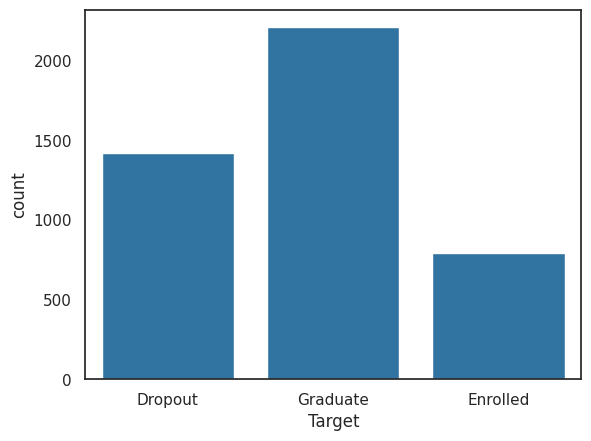

In [11]:
sns.countplot(x='Target', data=df) 

 Display summary statistics for numerical columns:


In [12]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


From the dataset description, it is clear that several features, such as **`Marital Status`**, **`Nationality`**, **`Course`**, and others, are **categorical** but represented as numerical values. These numbers act as **labels** or **codes** for different categories and do not carry any ordinal or numerical meaning.

For example:
- The mean of **`Marital Status`** in the dataset is **1.17**, which is illogical because averaging categories such as *Single*, *Married*, and *Widower* does not make sense.

#### Why this matters:
Treating such features as **numerical** can lead to incorrect or misleading results in analysis and modeling:
1. Calculating statistics such as the **mean** or **standard deviation** on categorical features does not provide any meaningful insights.
2. Using these features directly in machine learning models may introduce unintended biases or errors.


To check how many categories are there in a feature, use:


In [13]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

### <a id='feature-engineering'></a>[Feature engineering](#toc)

#### Mapping dataset

From the dataset, we can see that there are many categories in a various features. Now, to make the process simpler, we have mapped the values of categories to new values (grouped them together) to reduce the number of columns to work with. A snippet of one of the features that was mapped (`Marital status`), follows:

```
# Function to map categories to numbers
def map_categories(row, feature, mapping):
    return mapping.get(row[feature], -1)  # Default to -1 if the value is not in the mapping


# Reduce Marital Status categories
marital_status_mapping = {
    1: 1,  # Single
    2: 2,  # Married/Union
    3: 3,  # Separated/Other
    4: 3,  # Separated/Other
    5: 2,  # Married/Union
    6: 3   # Separated/Other
}

df['Marital status'] = df.apply(lambda row: map_categories(row, 'Marital status', marital_status_mapping), axis=1)```


Let's load the mapped dataset:


In [14]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/xmqtgnRT0GpQnTsjJHDVTw/mapped-dropout-data.csv')
data.head()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,5,2,1,2,122.0,1,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,4,1,3,1,2,160.0,1,2,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,1,1,5,2,1,2,122.0,1,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,1,1,2,2,1,2,122.0,1,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,2,5,1,3,0,2,100.0,1,1,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


We need to drop the redundant column `Unnamed: 0` that was created while saving the mapped dataset.


In [15]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,5,2,1,2,122.0,1,1,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,4,1,3,1,2,160.0,1,2,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,2,1,2,122.0,1,1,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,1,2,2,1,2,122.0,1,1,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,5,1,3,0,2,100.0,1,1,1,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


You can create graphs for each feature grouped by the target column. The distribution is influenced by various factors, including academic ones such as previous qualifications, as well as socio-economic challenges such as nationality, parental occupation, and tuition fees.


### <a id='data-visualization'></a>[Data visualization](#toc)  


In [16]:
# Get all the categorical columns and exlude the numeric ones
cat_columns = data.columns.to_list()

# List of numerical columns
num_columns = ['Previous qualification (grade)', 'Admission grade', 
               'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Remove the numerical columns from cat_columns
for col in num_columns:
    cat_columns.remove(col)
    
cat_columns

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target']

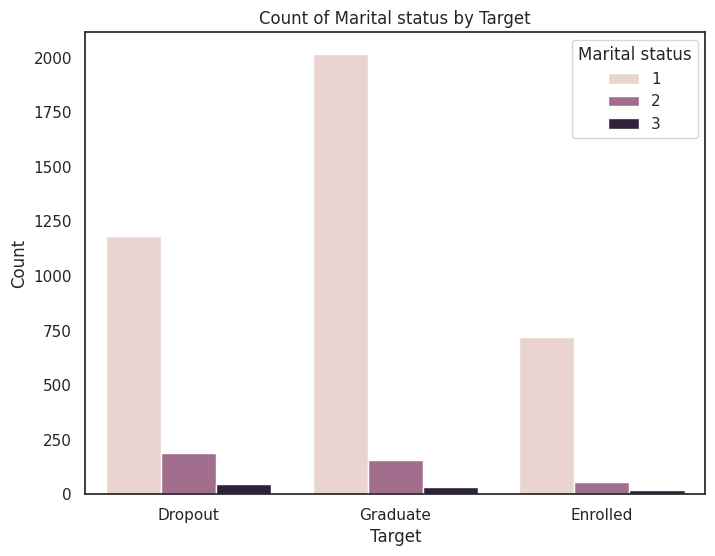

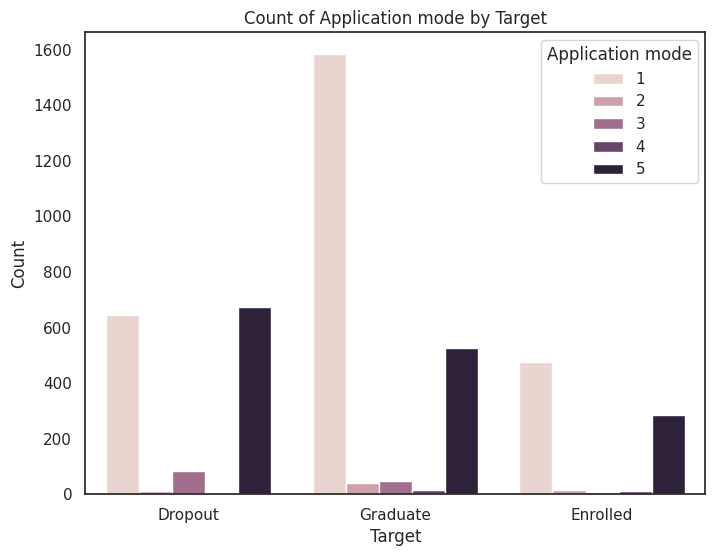

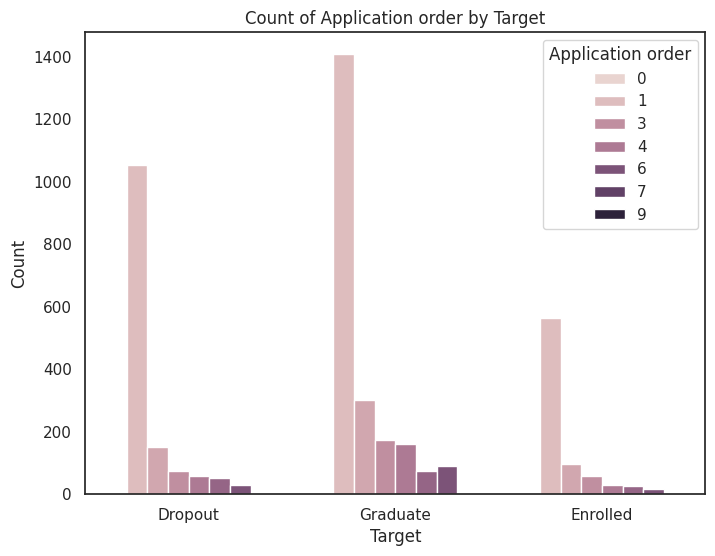

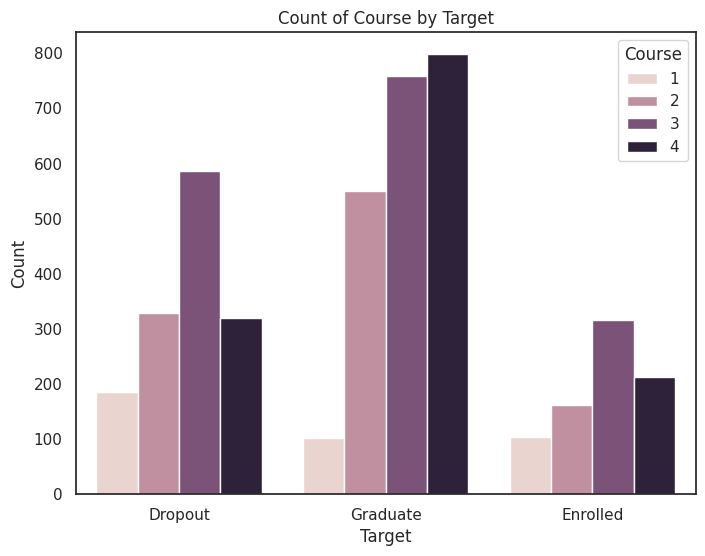

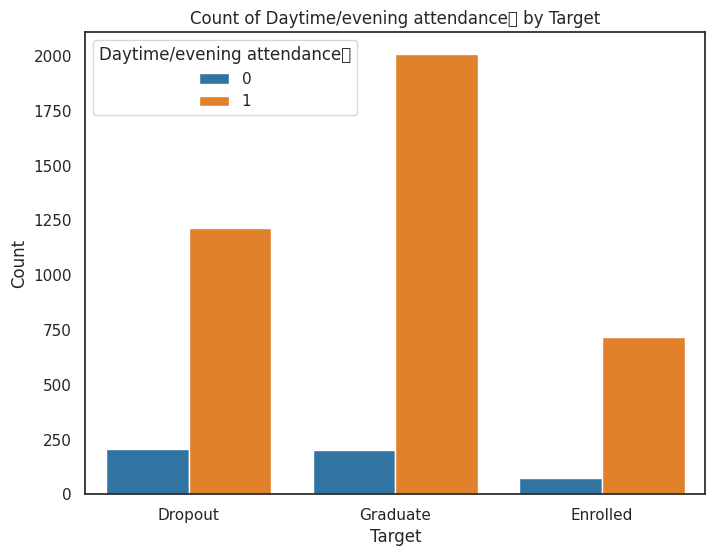

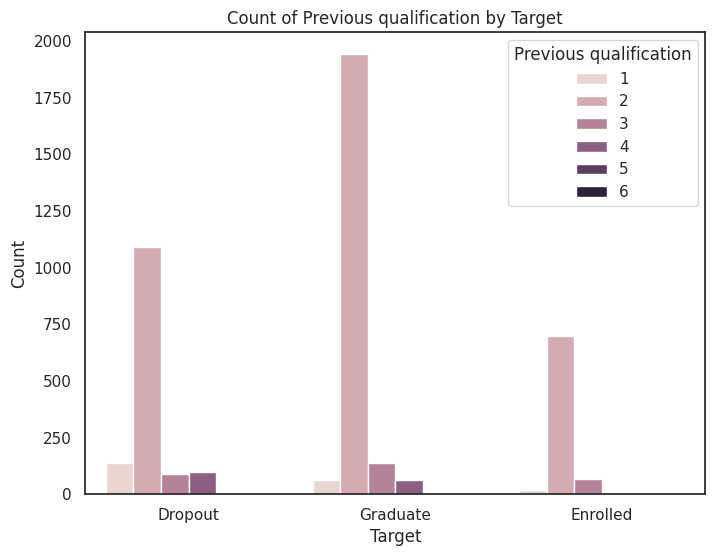

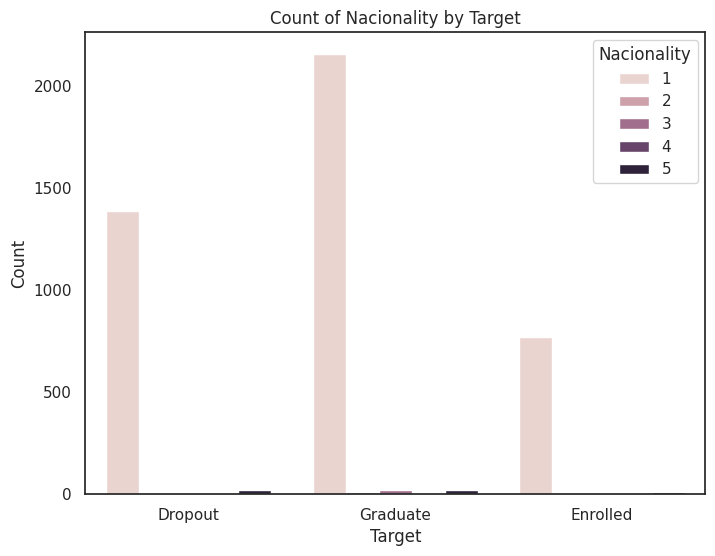

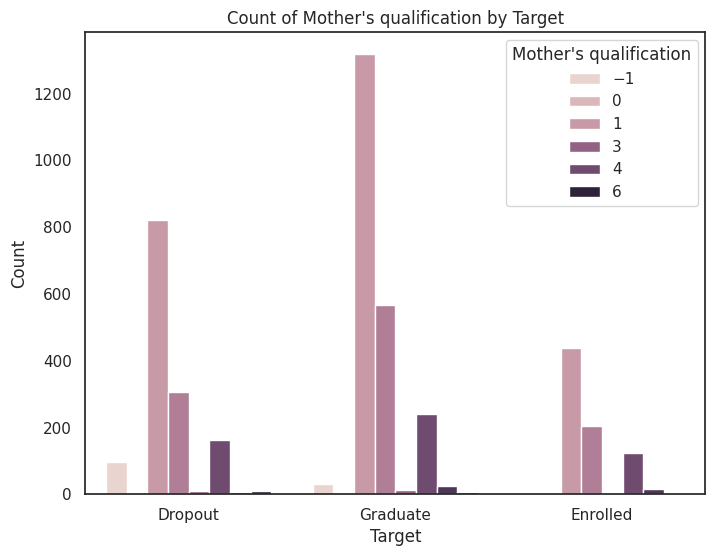

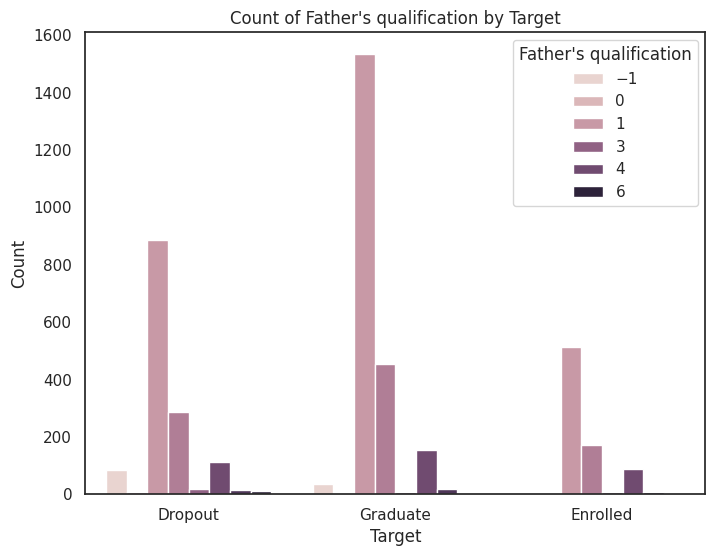

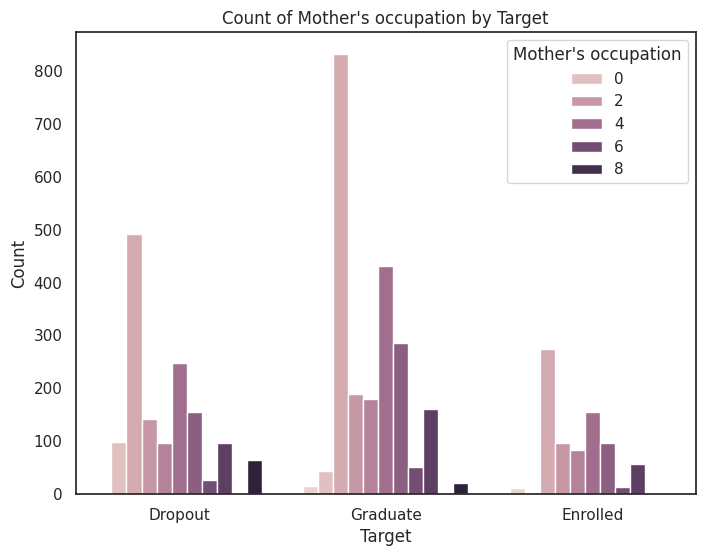

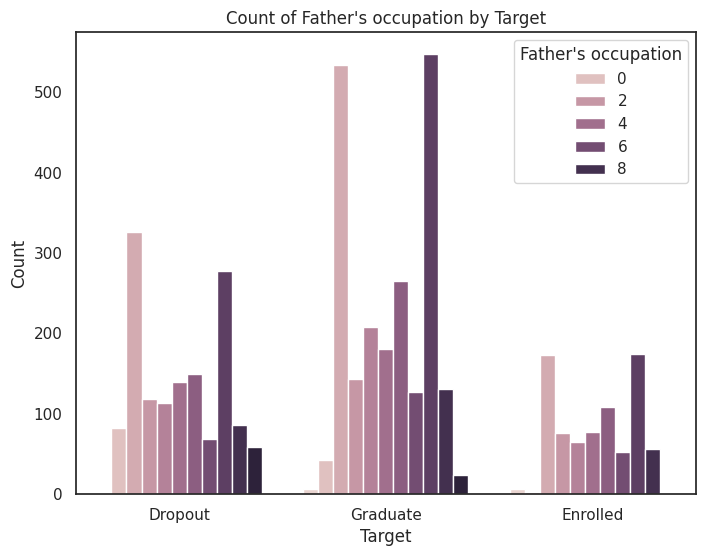

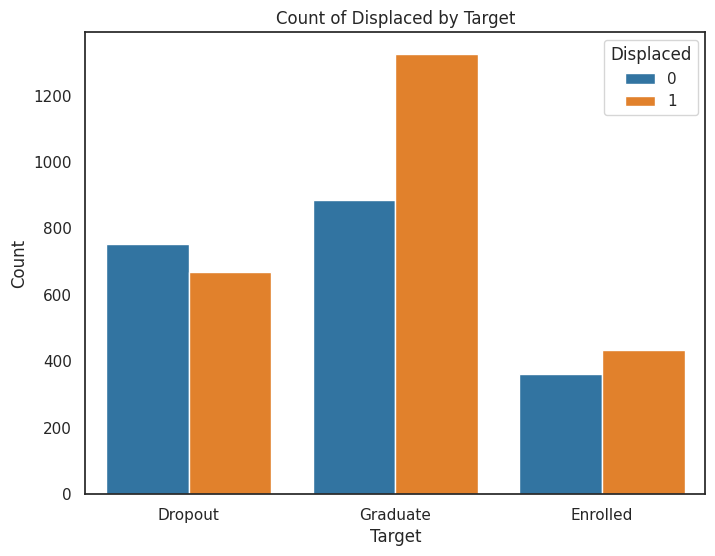

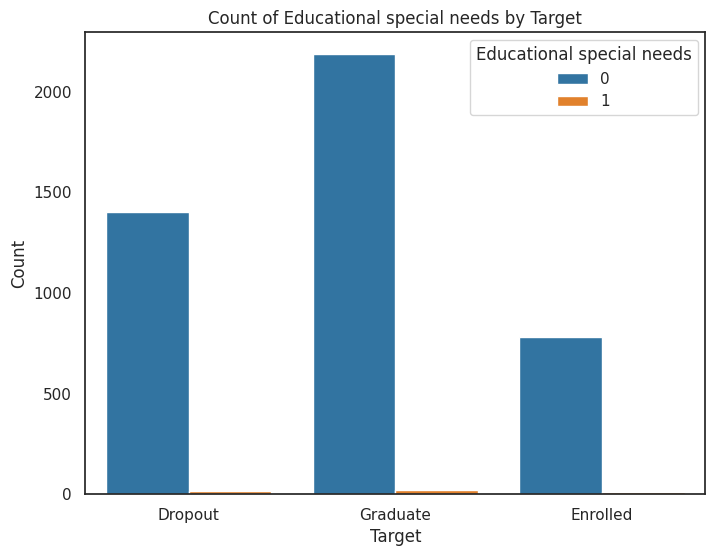

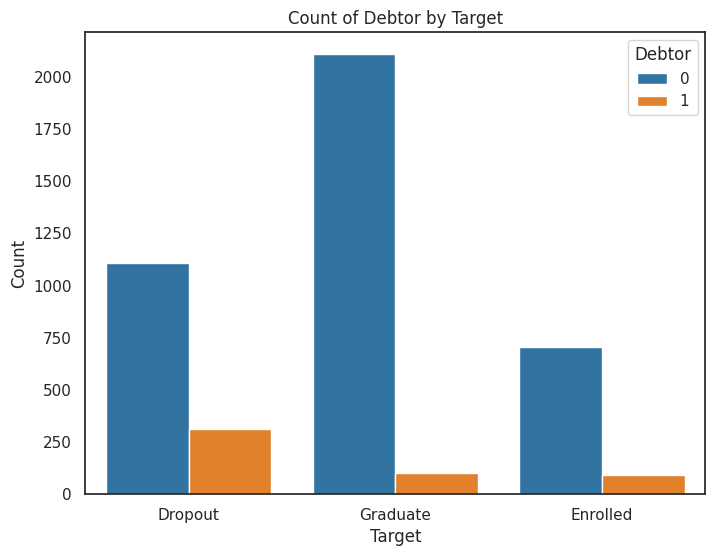

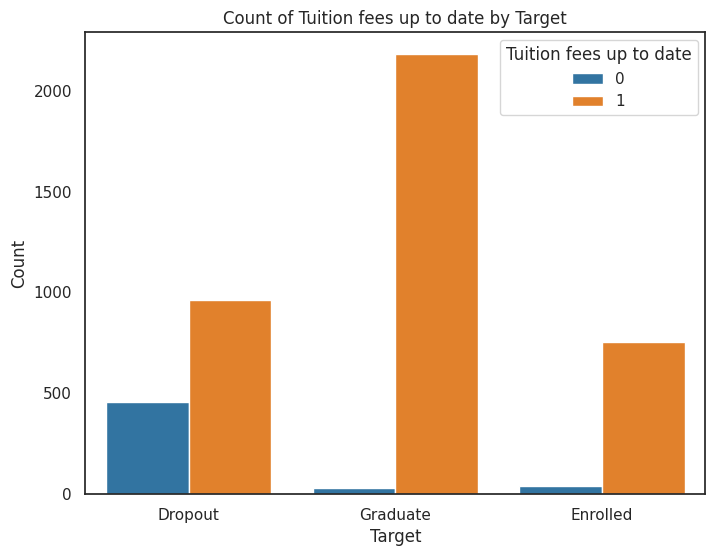

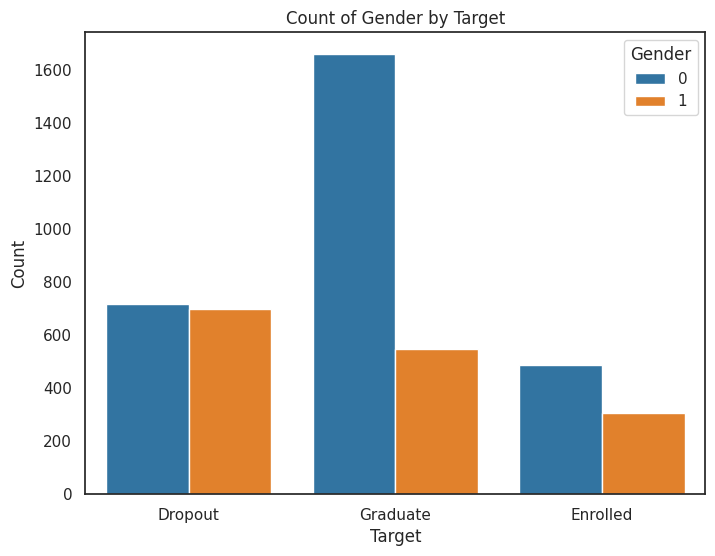

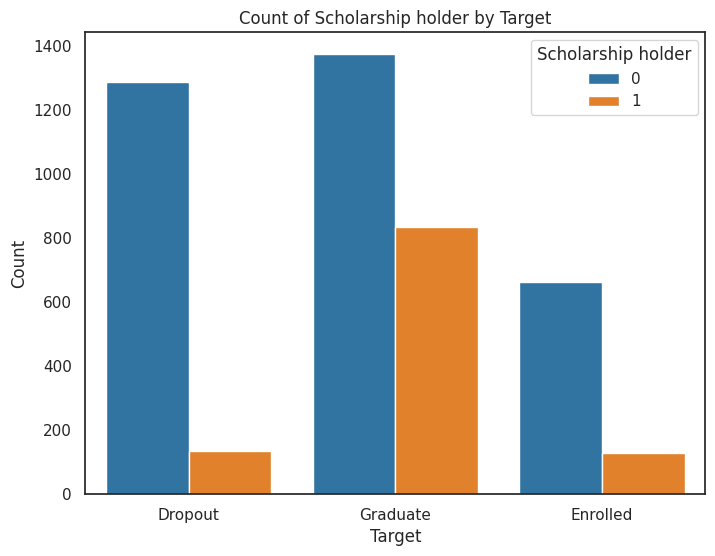

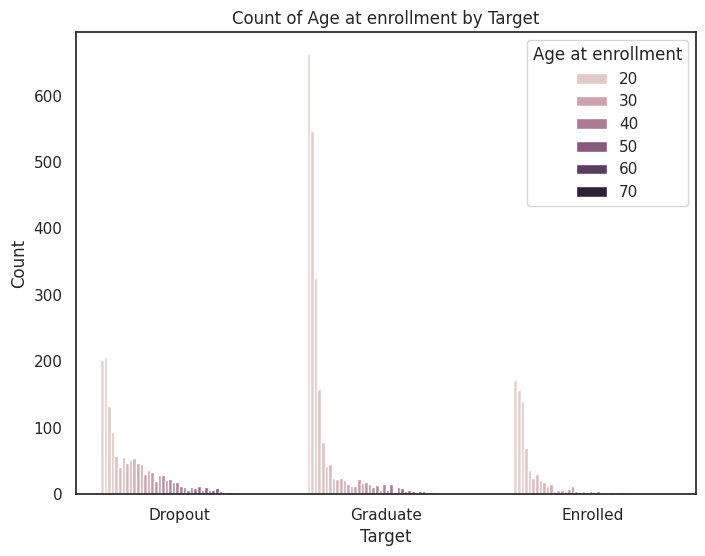

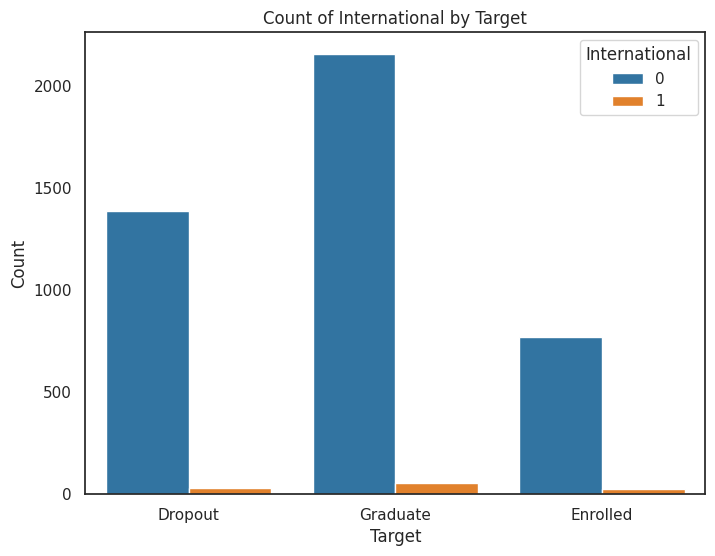

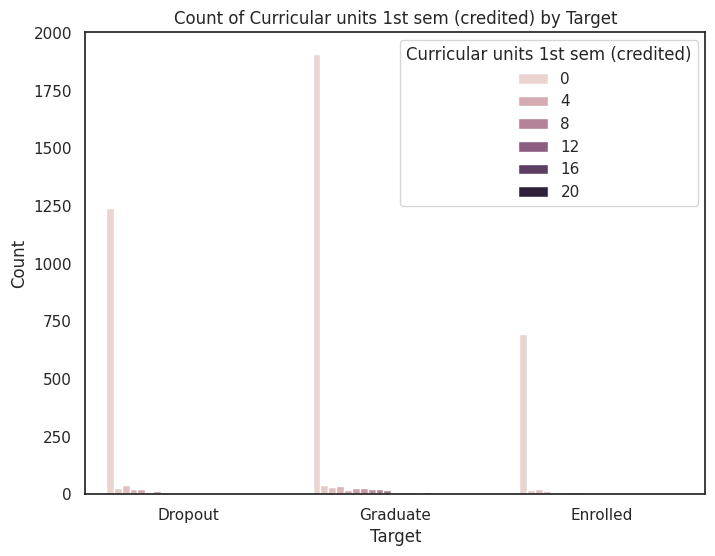

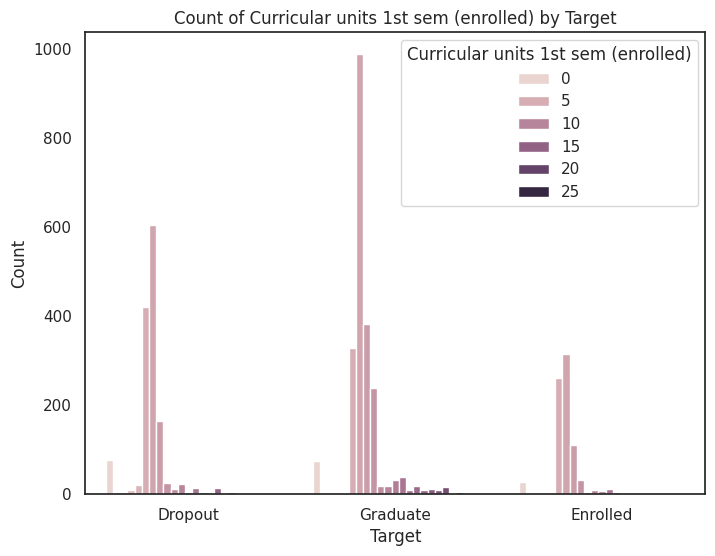

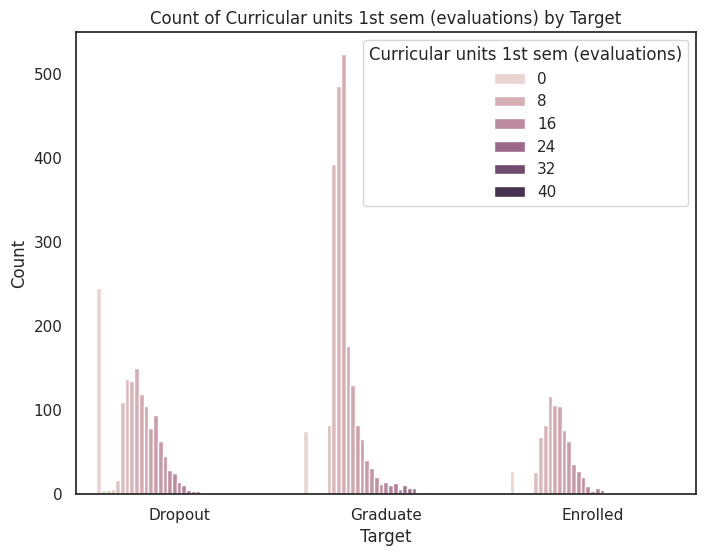

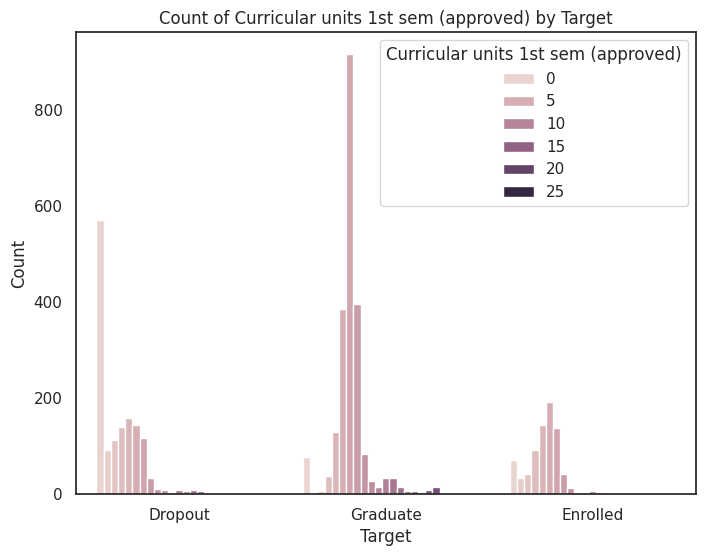

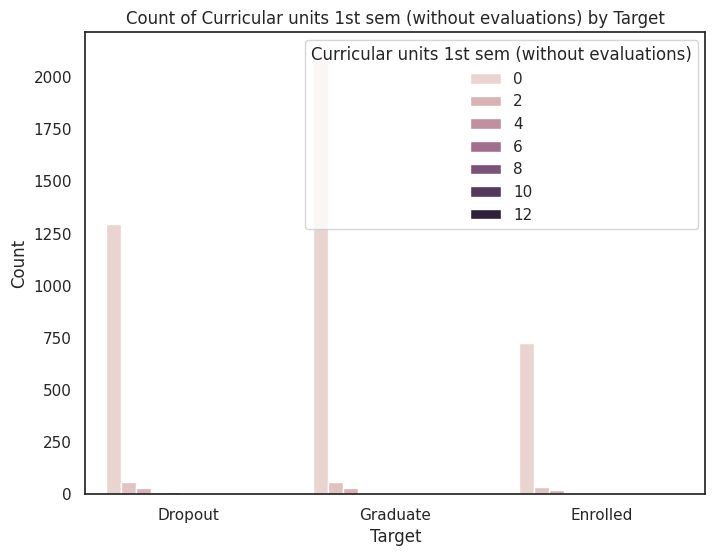

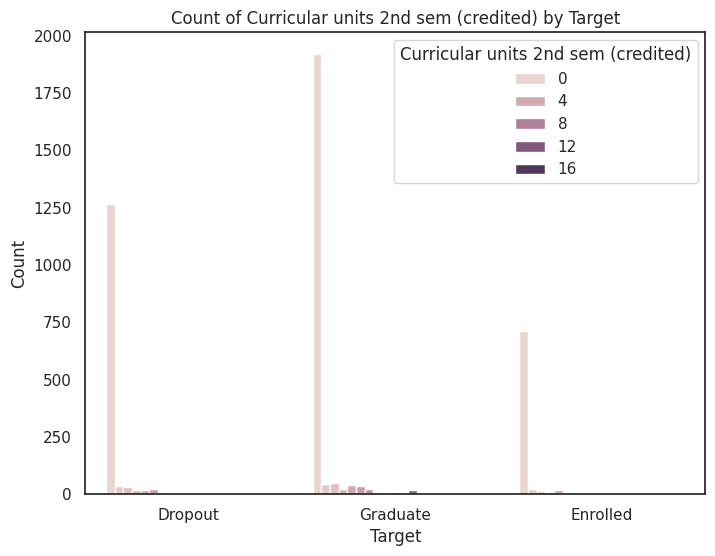

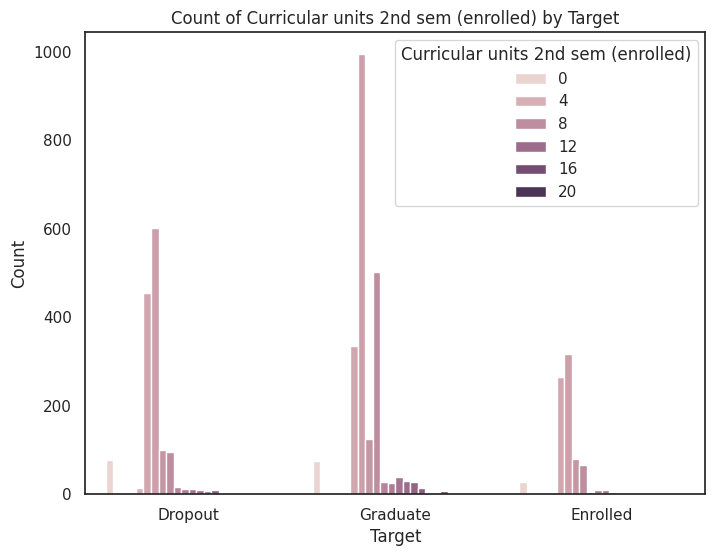

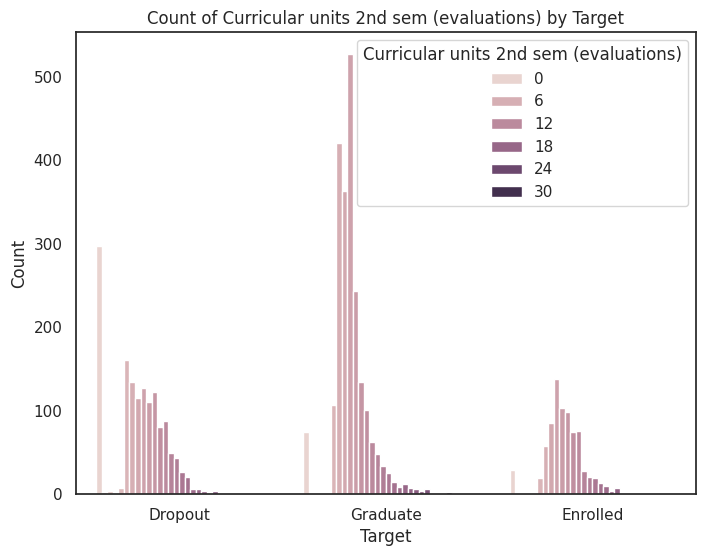

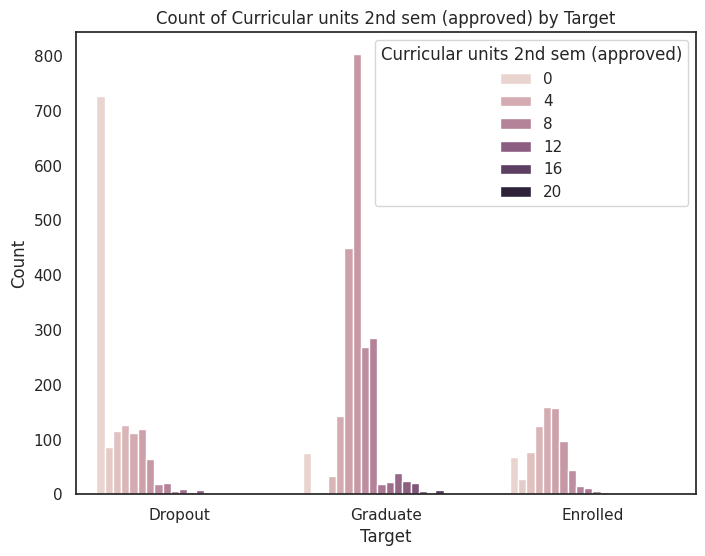

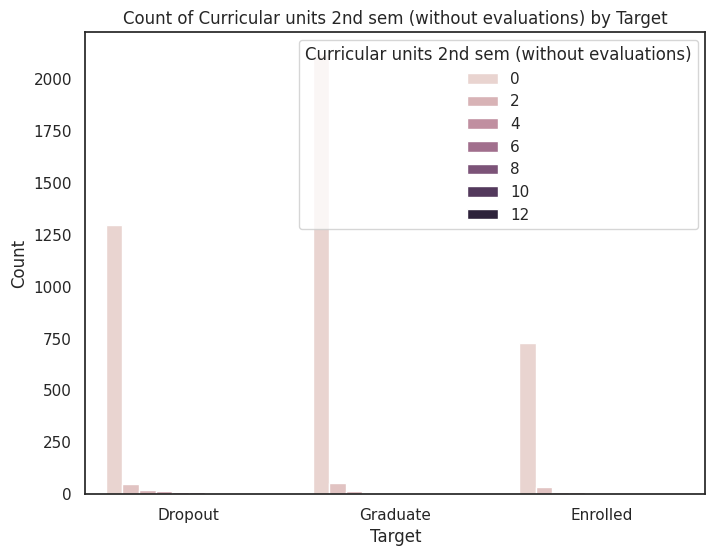

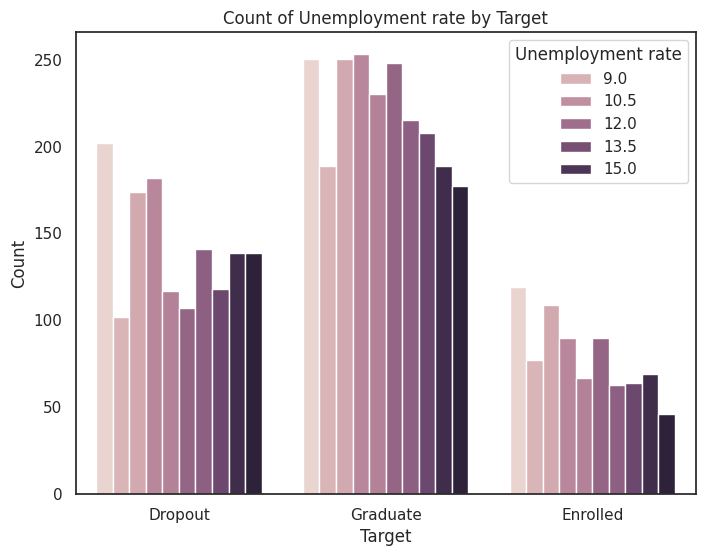

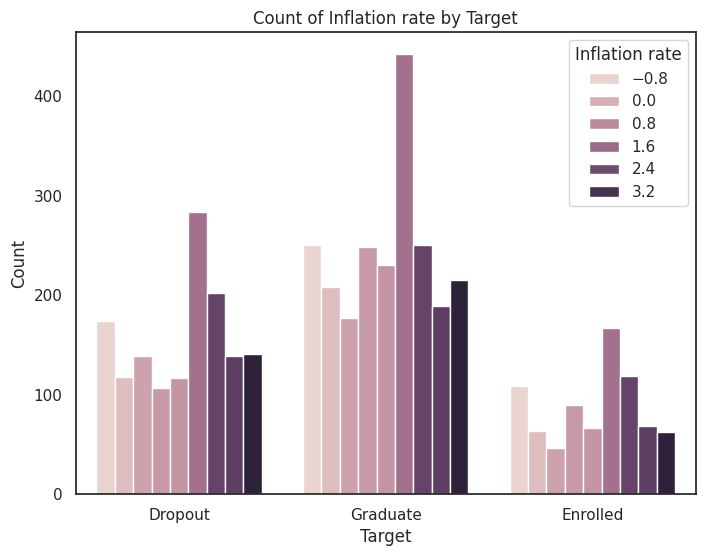

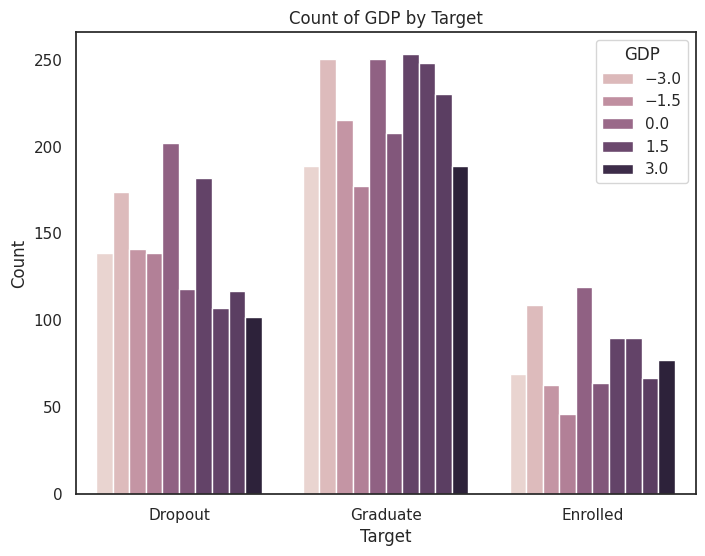

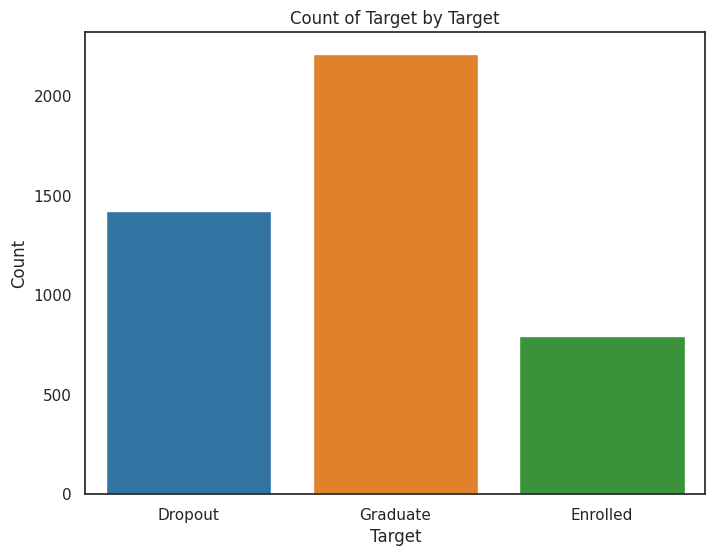

In [17]:
for column in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Target', hue=column, data=data)
    plt.title(f'Count of {column} by Target')
    plt.ylabel('Count')
    plt.xlabel('Target')
    plt.xticks(rotation=0)
    plt.show()

Now, let's take a look at the numerical feature's graph for better understanding:


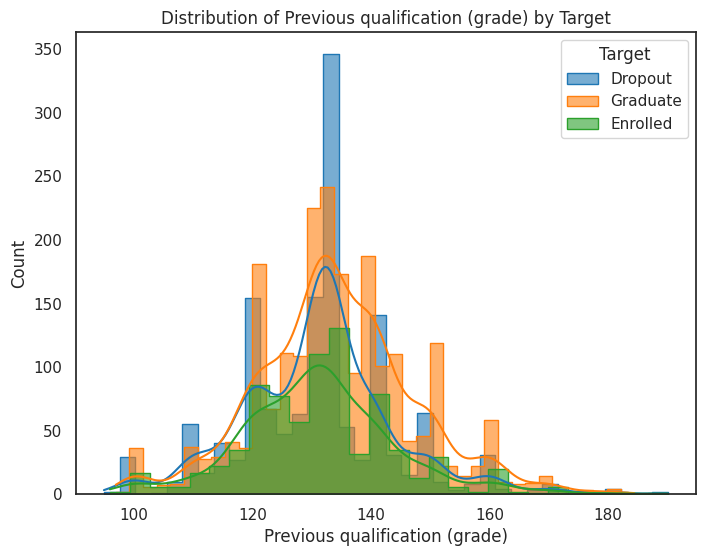

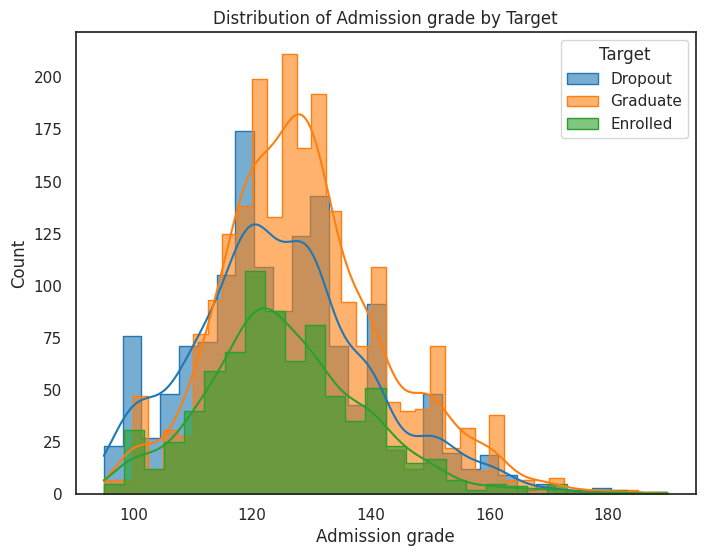

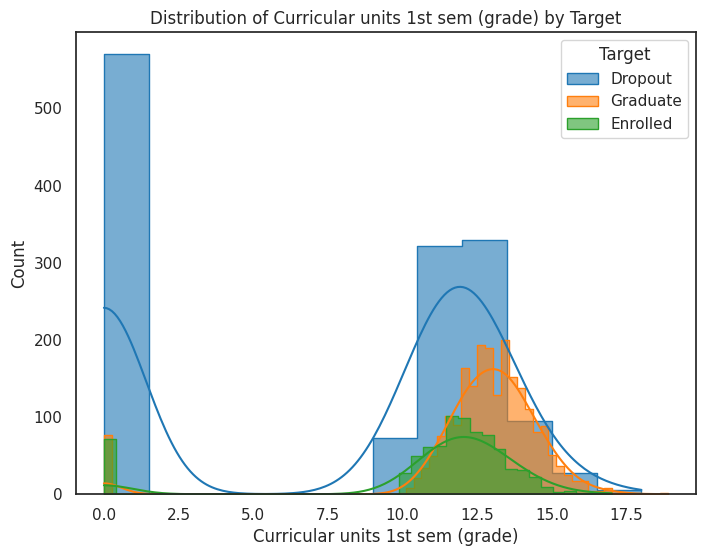

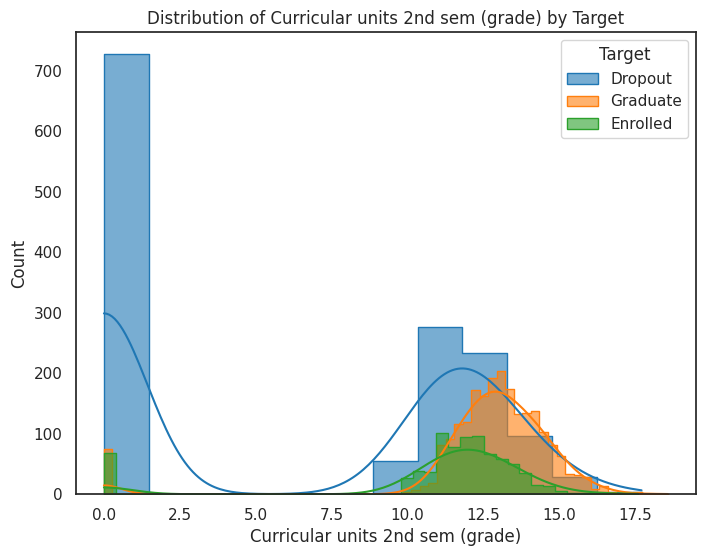

In [18]:
for column in num_columns:
    plt.figure(figsize=(8, 6))
    for target in data['Target'].unique():
        subset = data[data['Target'] == target]
        sns.histplot(subset[column], kde=True, label=target, element="step", alpha=0.6)
    plt.title(f'Distribution of {column} by Target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target')
    plt.show()

### <a id='model-training'></a>[Model training](#toc) 

Assign the `Target` column to the variable y to store the labels for classification tasks, and split the data into training and testing sets for model training and evaluation.


In [19]:
y = data['Target']
y.head()

0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object

Drop the 'Target' column from the DataFrame and assign the remaining features to X for use as input variables in the machine learning model.


In [20]:
X = data.drop('Target',axis=1)
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,5,2,1,2,122.0,1,1,1,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,4,1,3,1,2,160.0,1,2,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,2,1,2,122.0,1,1,1,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,1,2,2,1,2,122.0,1,1,1,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,5,1,3,0,2,100.0,1,1,1,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


Split the dataset into training and testing sets with 80% for training and 20% for testing, using a random seed for reproducibility.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### <a id='training-decision-tree-classifier'></a>[Training decision tree classifier](#toc)  
 
Train a `DecisionTreeClassifier` with default settings (skipping hyperparameter tuning via grid search), and evaluate the model using accuracy, confusion matrix, and classification report. Decision trees split the features using thresholds or categories directly without requiring numerical transformations, as they are able to work with non-numeric data efficiently. 


In [23]:
def decisonTreeClassifier(X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier(random_state=42)
    
    # Train the model on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    return y_pred, clf

In [24]:
y_pred, clf = decisonTreeClassifier(X_train, y_train, X_test, y_test)

In [25]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: \n{conf_matrix}\n")
print(f"Classification Report: \n{class_report}")

Accuracy: 0.6937853107344633

Confusion Matrix: 
[[202  52  30]
 [ 44  76  31]
 [ 52  62 336]]

Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.68      0.71      0.69       284
    Enrolled       0.40      0.50      0.45       151
    Graduate       0.85      0.75      0.79       450

    accuracy                           0.69       885
   macro avg       0.64      0.65      0.64       885
weighted avg       0.72      0.69      0.70       885



The model achieved an overall **accuracy of 70%**. While the precision and recall for the **Graduate** class are high (precision: 0.84, recall: 0.79), performance for the **Enrolled** class is significantly lower, with a precision of **0.37** and recall of **0.42**, indicating that the model struggles to predict this class correctly. The **Dropout** class has balanced performance with a precision and recall around **0.70**.


Let's visualize the confusion matrix with class labels using `ConfusionMatrixDisplay` for visual evaluation of model performance.


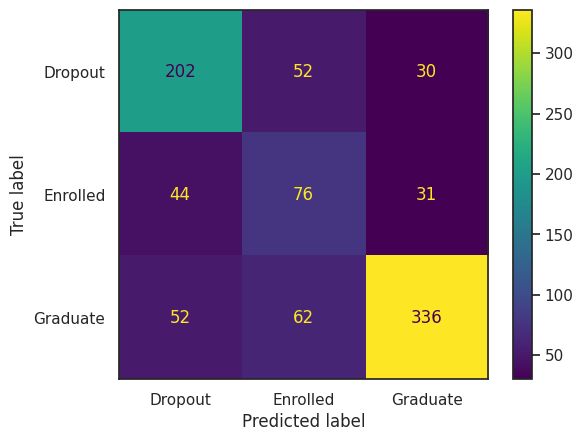

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf.classes_)
disp.plot()
plt.show()

The confusion matrix shows that the model performs well in predicting the **Graduate** class, with **355 correct predictions out of 450**. For the **Dropout** class, **201 instances were correctly classified**, but **52 were misclassified as Enrolled** and **31 as Graduate**, indicating some overlap. The **Enrolled** class has the highest misclassification, with a large number of predictions being confused with both **Dropout** and **Graduate**, highlighting the model's difficulty in distinguishing this class from others.


### <a id='feature-importance-in-decision-tree'></a>[Feature importance in decision tree](#toc)


Feature importance scores indicate how important each feature is in making predictions. They represent how much splitting based on a particular feature reduces the classification error, entropy, or Gini index in decision trees or random forests. Essentially, the higher the feature importance score, the more that feature contributes to improving the model's performance. We can print out the feature names alongside their corresponding importance scores to better understand which features are driving the predictions. Feature importance also aids in interpretability of the machine learning model.


In [27]:
print("Feature name ", X_train.columns, "\n")
print("Feature importance ", clf.feature_importances_)

Feature name  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curric

The following function will plot the feature importance in a bar graph (the fuction `display_feature_importances` is defined in the Helper function section at the beginning of the notebook).


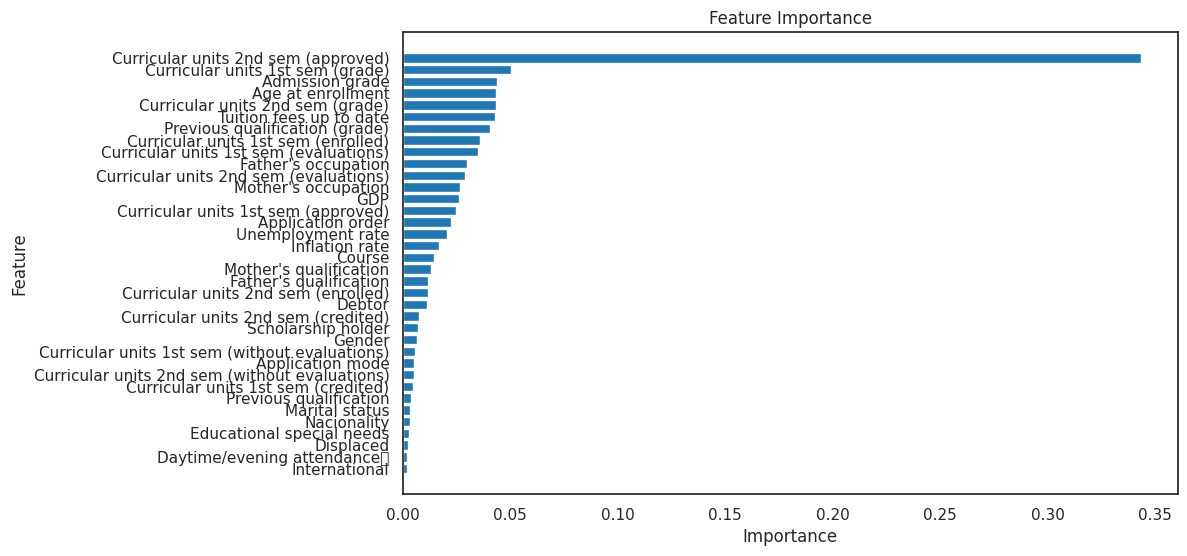

In [28]:
feature_importance_trees = display_feature_importances(clf, X_train.columns)

### <a id='insights-from-feature-importance-and-identifying-data-leakage'></a>[Insights from feature importance and identifying data leakage](#toc)    

The feature **"Curricular units 2nd sem (approved)"** has the **highest importance** by a significant margin compared to all other features. This dominance is suspicious and raises concerns about potential **data leakage** in the model.

#### Identifying data leakage
Upon further inspection of the dataset:

- **"Curricular units 2nd sem (approved)"** is highly correlated with the target variable (e.g., Dropout, Enrolled, Graduate).
- Conceptually, this feature reflects an **outcome** rather than a predictive input because it depends on what happens **after** the event we are trying to predict.  
  - For example, if a student drops out during the semester, they will not complete or pass any courses, resulting in **0 approved units**.  
  - This is a **result of dropping out**, not something that causes it. 

Including such features in model training introduces **data leakage** because the model indirectly learns information about the target variable that would **not** be available at the time of prediction.


### <a id='training-random-forest-classifier'></a>[Training random forest classifier](#toc)  

A Random Forest is an ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It is better than individual decision trees because it averages the results of many trees, leading to more robust and generalized predictions. Additionally, Random Forests can generate feature importance scores, showing which features contribute most to making decisions across the entire forest.

The code for training and evaluating a Random Forest is almost identical to that for a Decision Tree. The key difference is that the Random Forest builds multiple decision trees and combines their predictions, while a single Decision Tree uses only one model. In the Random Forest, the number of trees (n_estimators) is an important hyperparameter that can be tuned to control the number of trees in the ensemble, typically leading to more stable and accurate predictions as the number increases.


In [29]:
def randomForestClassifier(X_train, y_train, X_test, y_test):
    random_forest_model = RandomForestClassifier(random_state=42,n_estimators=100)
    
    # Train the model on the training set
    random_forest_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = random_forest_model.predict(X_test)

    return y_pred, random_forest_model

In [30]:
y_pred, random_forest_model = randomForestClassifier(X_train, y_train, X_test, y_test)

In [31]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: \n{conf_matrix}\n")
print(f"Classification Report: \n{class_report}")

Accuracy: 0.8

Confusion Matrix: 
[[218  34  32]
 [ 37  67  47]
 [ 14  13 423]]

Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       284
    Enrolled       0.59      0.44      0.51       151
    Graduate       0.84      0.94      0.89       450

    accuracy                           0.80       885
   macro avg       0.75      0.72      0.73       885
weighted avg       0.79      0.80      0.79       885



The model achieved an overall **accuracy of 80%**, showing improved performance compared to previous results. The **Graduate** class continues to perform exceptionally well, with a precision of **0.83** and a high recall of **0.94**, indicating that the model correctly identifies most graduates. For the **Dropout** class, both precision and recall remain balanced at around **0.83** and **0.79**, respectively, highlighting reliable performance. However, the **Enrolled** class still struggles, with a lower precision of **0.61** and recall of **0.43**, suggesting the model has difficulty distinguishing this class from the others.


Let's visualize the confusion matrix with class labels using `ConfusionMatrixDisplay` for visual evaluation of model performance.


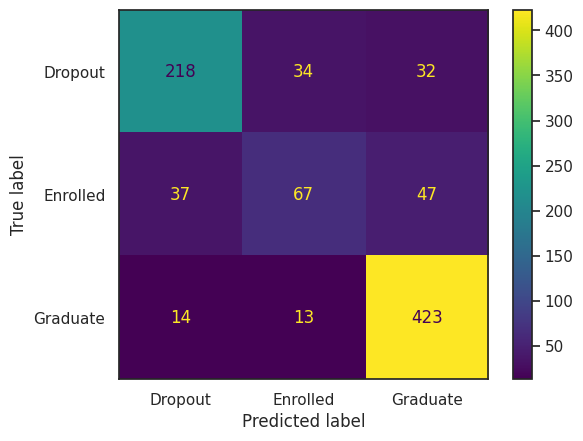

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=random_forest_model.classes_)
disp.plot()
plt.show()

The confusion matrix shows that the model performs exceptionally well in predicting the **Graduate** class, with **423 correct predictions out of 450**. For the **Dropout** class, **224 instances were correctly classified**, but **25 were misclassified as Enrolled** and **35 as Graduate**, indicating some overlap with other classes. The **Enrolled** class exhibits the highest misclassification, with **35 instances misclassified as Dropout** and **51 as Graduate**, highlighting the model's difficulty in distinguishing this class from others.


On average, the decision tree performs well, particularly in terms of precision and recall for the **Dropout** predictions. Additionally, the **feature importance** provides insights into which features contribute the most to the model's predictions. In a decision tree, feature importance is calculated based on how much each feature reduces the impurity (e.g., Gini or entropy) across all splits in the tree. This information helps identify the most influential features that improve the model's accuracy and can guide further analysis or feature selection.


### <a id='feature-importance-in-random-forest'></a>[Feature importance in random forest](#toc)  

The following function will plot the feature importance in a bar graph (the fuction `display_feature_importances` is defined in the helper function section at the beginning of the notebook).


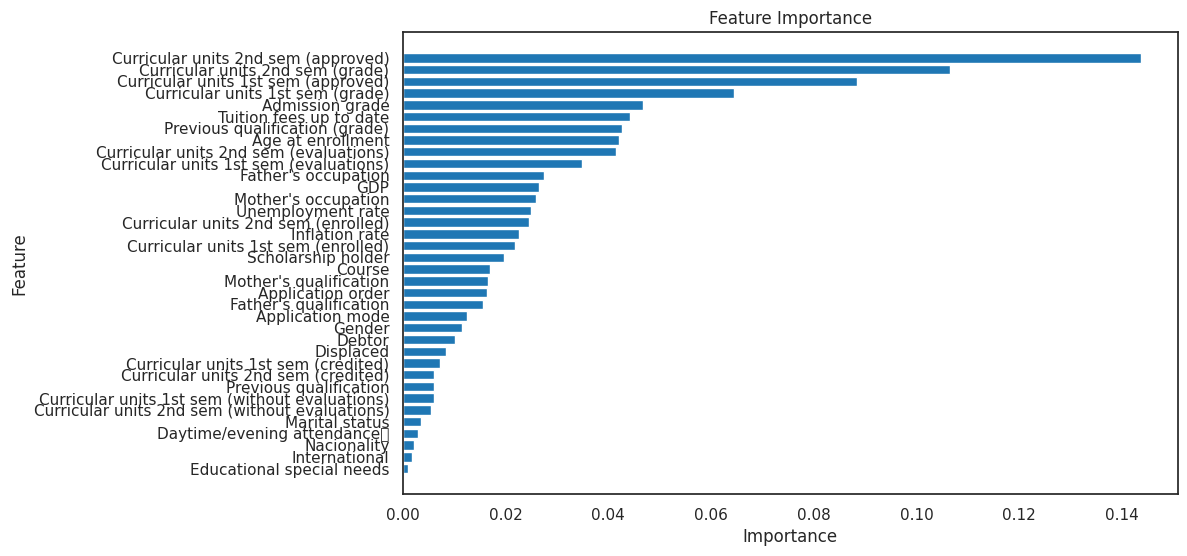

In [33]:
feature_importance_rf = display_feature_importances(random_forest_model, X_train.columns)

## <a id='handling-data-leakage'></a>[Handling data leakage](#toc) 

We observed that **'Curricular units 2nd sem (approved)'** had the **highest feature importance** in our model. This raised a red flag, prompting us to investigate further for potential **data leakage**. 

#### How we identified data leakage

1. **Conceptual analysis**:
   - The feature **'Curricular units 2nd sem (approved)'** indicates the number of courses a student passed in the second semester.
   - If a student drops out mid-semester, they would naturally have **0 approved units**. This means the feature is a **consequence of the target outcome** (Dropout, Enrolled, Graduate), not a predictor.

2. **Correlation with target**:
   - Upon checking, we found that the feature was highly correlated with the target variable.
   - For example, **dropouts consistently had 0 approved units**, directly signaling the outcome.

3. **Timing issue**:
   - Since this information is only known **after the semester ends**, it would not be available at the time we are trying to make predictions (e.g., predicting dropout risk early in the semester).

#### Addressing data leakage

To ensure a fair and realistic model:

1. We will **remove the column 'Curricular units 2nd sem (approved)'** from the dataset.
2. We will retrain the **DecisionTreeClassifier** to evaluate its performance without this feature.

By addressing data leakage, the model now uses only **valid predictors** available before the outcome occurs, ensuring it can generalize to unseen data more effectively.


In [34]:
data = data.drop('Curricular units 2nd sem (approved)', axis=1)
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd se

In [35]:
# After dropping the column we begin the model training
y = data['Target']
y.head()

X = data.drop('Target',axis=1)
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
y_pred, clf = decisonTreeClassifier(X_train, y_train, X_test, y_test)

In [37]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: \n{conf_matrix}\n")
print(f"Classification Report: \n{class_report}")

Accuracy: 0.6384180790960452

Confusion Matrix: 
[[190  63  31]
 [ 45  60  46]
 [ 58  77 315]]

Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.65      0.67      0.66       284
    Enrolled       0.30      0.40      0.34       151
    Graduate       0.80      0.70      0.75       450

    accuracy                           0.64       885
   macro avg       0.58      0.59      0.58       885
weighted avg       0.67      0.64      0.65       885



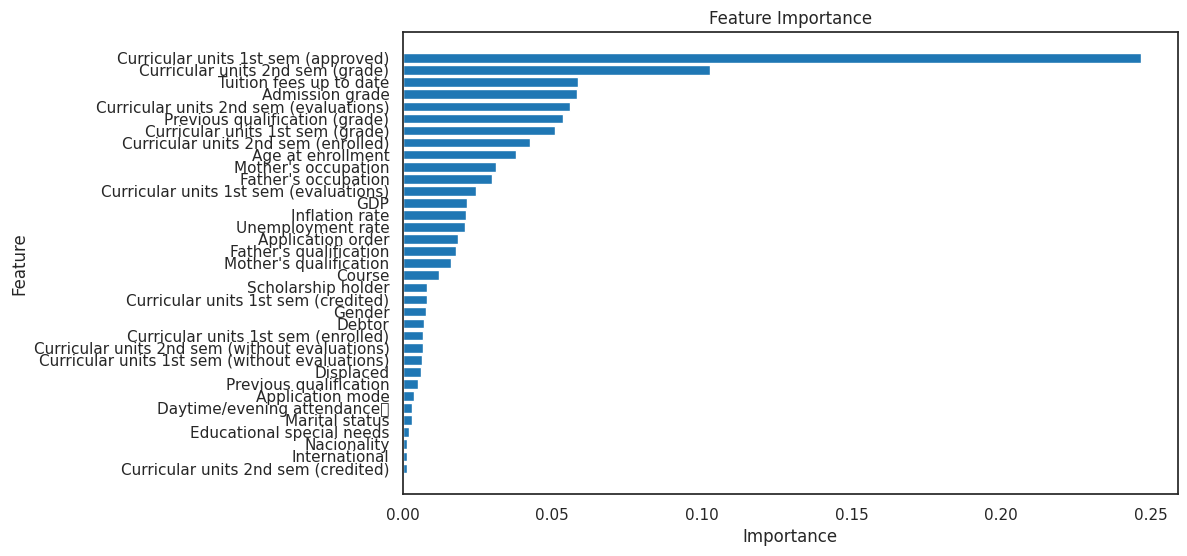

In [38]:
feature_importance_trees = display_feature_importances(clf, X_train.columns)

### <a id='insights-from-feature-importance-after-data-leakage'></a>[Insights from feature importance after data leakage](#toc)  

1. **Top features**:
   - The feature **"Curricular units 1st sem (approved)"** has the highest importance, followed by **"Curricular units 2nd sem (grade)"** and **"Tuition fees up to date"**.
   - These features dominate the predictions, suggesting they are strong signals for predicting student outcomes.

2. **Potential data leakage**:
   - Similar to the earlier case with **"Curricular units 2nd sem (approved)"**, the feature **"Curricular units 1st sem (approved)"** also needs to be carefully analyzed for **data leakage**.
     - Conceptually, the number of approved courses in the first semester may reflect information that becomes available **after the semester ends**.
     - If students drop out mid-semester, they may have **0 approved courses**, making this feature a consequence of dropping out rather than a cause.

3. **Suspicion of timing issues**:
   - Features such as **"Curricular units 2nd sem (grade)"** and **"Curricular units 2nd sem (evaluations)"** may also have timing-related issues, as they indicate outcomes or progress after the semester concludes.


### <a id='addressing-additional-data-leakage'></a>[Addressing additional data leakage](#toc)  

After careful consideration and a detailed review of the dataset, it has been observed that several features may introduce **data leakage** into the model. These features reflect outcomes or progress that occur **after the event we are trying to predict** (e.g., dropout, enrolled, graduate). Using such features violates the principle of predictive modeling, as this information would not be available at the time of prediction.

The following features were identified to contain data leakage:

- **'Curricular units 1st sem (approved)'**
- **'Curricular units 2nd sem (grade)'**
- **'Curricular units 1st sem (grade)'**
- **'Curricular units 2nd sem (evaluations)'**
- **'Curricular units 1st sem (enrolled)'**
- **'Curricular units 2nd sem (enrolled)'**
- **'Curricular units 1st sem (credited)'**
- **'Curricular units 1st sem (evaluations)'**
- **'Curricular units 1st sem (without evaluations)'**
- **'Curricular units 2nd sem (credited)'**
- **'Curricular units 2nd sem (without evaluations)'**

These columns either represent approved units, grades, or evaluations, which are **results** of the academic process rather than inputs available at the start. To mitigate data leakage, we will remove these columns from the dataset:


In [39]:
data = data.drop(['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (without evaluations)'], axis=1)

In [40]:
# After dropping the column we begin the model training
y = data['Target']
y.head()

X = data.drop('Target',axis=1)
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
y_pred, clf = decisonTreeClassifier(X_train, y_train, X_test, y_test)

In [42]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: \n{conf_matrix}\n")
print(f"Classification Report: \n{class_report}")

Accuracy: 0.503954802259887

Confusion Matrix: 
[[141  42 101]
 [ 42  39  70]
 [ 92  92 266]]

Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.51      0.50      0.50       284
    Enrolled       0.23      0.26      0.24       151
    Graduate       0.61      0.59      0.60       450

    accuracy                           0.50       885
   macro avg       0.45      0.45      0.45       885
weighted avg       0.51      0.50      0.51       885



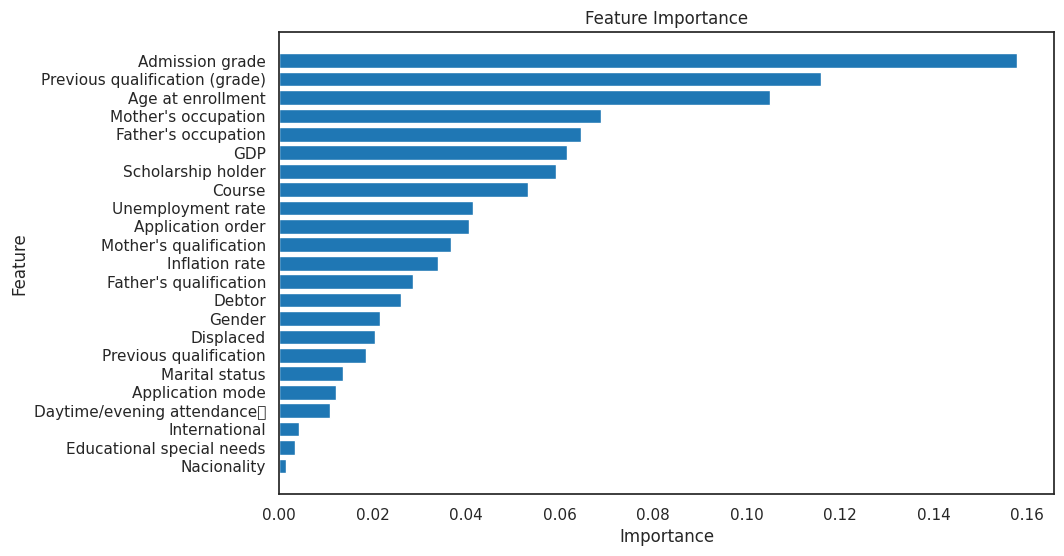

In [43]:
feature_importance_trees = display_feature_importances(clf, X_train.columns)

### <a id='insights-from-feature-importance-after-additional-data-leakage'></a>[Insights from feature importance after additional data leakage](#toc)  

After addressing **data leakage** by removing outcome-based features such as **'Curricular units 1st sem (approved)'** and others, we now see a more balanced and realistic distribution of feature importance.

1. **Top features**:
   - **"Admission grade"** and **"Previous qualification (grade)"** are now the most important features, which makes sense as they represent **prior academic performance** available at the time of enrollment.
   - **"Age at enrollment"**, **"Mother's occupation"**, and **"Father's occupation"** are also key predictors, reflecting demographic and socio-economic factors that can influence a student’s success.

2. **Removal of outcome-based features**:
   - By eliminating features that directly reflect academic results (e.g., approved courses, evaluations, grades during semesters), we have mitigated **data leakage**.
   - The model now uses features that are available **before or at the time of prediction**, ensuring fairness and generalizability.

3. **Balanced contributions**:
   - Features like **"Scholarship holder"**, **"Unemployment rate"**, and **"Course"** provide meaningful contributions, indicating that multiple factors influence the prediction.

Before handling **data leakage**, the decision tree model achieved higher accuracy, but this performance was misleading as it relied on **outcome-based features** that would not be available at prediction time. While accuracy dropped after removing these features, the updated model now reflects a **realistic and fair evaluation**, using only valid predictors available **before the event occurs**. Addressing data leakage is crucial to ensure the model is robust, generalizable, and trustworthy for real-world applications.

#### Conclusion:
The updated model now relies on valid predictors without data leakage. The feature importance graph shows a logical hierarchy of factors, such as prior academic performance, socio-economic conditions, and demographic attributes. This ensures the model's predictions are both interpretable and robust for real-world use.


Now let's check how is the scenario by training `randomForestClassifier` with the updated dataset.


In [44]:
y_pred, random_forest_model = randomForestClassifier(X_train, y_train, X_test, y_test)

In [45]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: \n{conf_matrix}\n")
print(f"Classification Report: \n{class_report}")

Accuracy: 0.6203389830508474

Confusion Matrix: 
[[172  16  96]
 [ 49  19  83]
 [ 73  19 358]]

Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.59      0.61      0.60       284
    Enrolled       0.35      0.13      0.19       151
    Graduate       0.67      0.80      0.73       450

    accuracy                           0.62       885
   macro avg       0.53      0.51      0.50       885
weighted avg       0.59      0.62      0.59       885



### <a id='comparison-between-decision-tree-and-random-forest-models'></a>[Comparison between decision tree and random forest models](#toc)

| **Metric**               | **Decision tree**       | **Random forest**        | **Observation**                       |
|--------------------------|-------------------------|--------------------------|---------------------------------------|
| **Accuracy**             | 50.4%                  | 62.0%                   | The **Random forest** model achieves a higher accuracy, compared to **Decision tree**, highlighting the benefit of using an ensemble method. |
| **Dropout class (F1-Score)** | 0.50                  | 0.60                    | Random Forest performs better, with a higher F1-Score versus the Decision Tree. This indicates better classification for this class. |
| **Enrolled class (F1-Score)** | 0.24                  | 0.19                    | Both models struggle significantly with the **Enrolled** class. The Decision Tree has slightly higher recall, but overall performance remains poor, suggesting the need for further improvements such as resampling or feature engineering. |
| **Graduate class (F1-Score)** | 0.60                  | 0.73                    | Random Forest excels in predicting the **Graduate** class, achieving a better F1-Score compared to Decision Tree. This highlights its strength in handling majority classes. |

### Conclusion:
The **random forest** model outperforms the **decision tree** in overall accuracy and most individual class performances, particularly for **Dropout** and **Graduate** classes. However, both models face challenges with the **Enrolled** class, indicating a need for further refinement, such as addressing class imbalance or feature enhancement.


However, despite these advantages, random forests are not as interpretable as single decision trees. Since they combine the results of many trees, understanding the specific decision-making process for a given prediction becomes complex and difficult to visualize. This makes them less ideal for scenarios where model transparency is important.


### <a id='tree-visualization'></a>[Tree visualization](#toc)

The **decision Tree visualization** provides a clear and interpretable representation of the model’s decision-making process. By setting **`max_depth=2`**, we limit the tree's depth to focus on the **top-level splits**, showing the most influential features and their thresholds. The **`filled=True`** and **`rounded=True`** options enhance readability, allowing us to easily distinguish between classes and understand how features are used to make predictions.


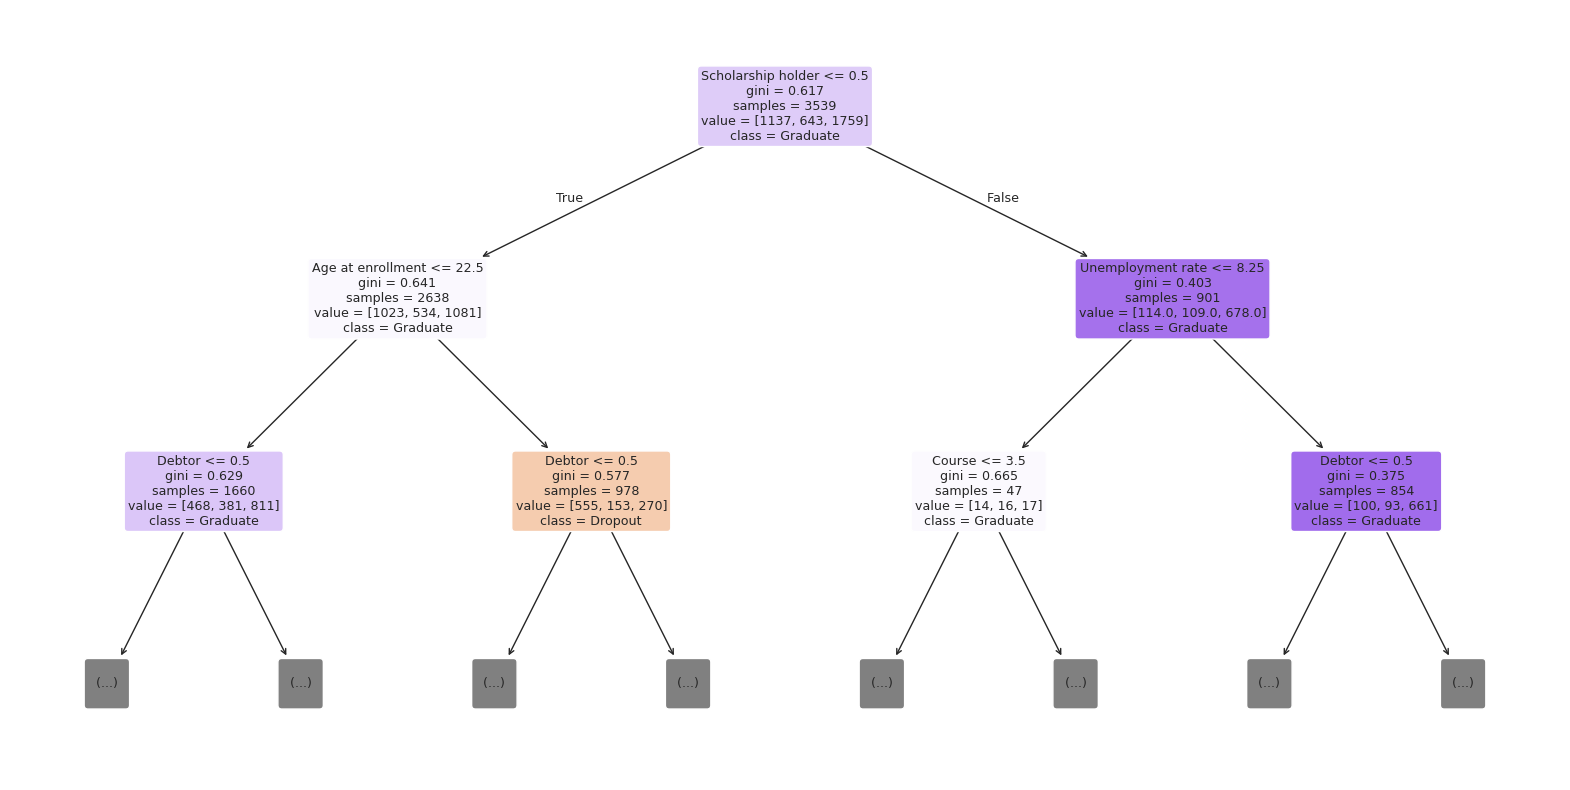

In [46]:
plt.figure(figsize=(20,10))  # Adjust the size for better readability
plot_tree(clf, feature_names=X_test.columns, class_names=clf.classes_,max_depth=2, filled=True, rounded=True)
plt.show()

### <a id='decision-tree-insights'></a>[Tree insights](#toc)

1. **Root node**:  
   - The tree starts with **"Scholarship holder <= 0.5"** as the primary split, dividing students based on whether they hold a scholarship.

2. **Left branch (No scholarship)**:  
   - Key splits include **"Age at enrollment <= 22.5"** and **"Debtor <= 0.5"**, leading to classifications such as **Dropout** and **Graduate**.

3. **Right branch (With Scholarship)**:  
   - Further splits on **"Unemployment rate <= 8.25"** and **Debtor status** predict **Graduate** outcomes with lower impurity.

4. **Leaf nodes**:  
   - Final outcomes (e.g., **Dropout** or **Graduate**) are determined based on these features, with **Gini index** values indicating the confidence of each classification.

The tree identifies **Scholarship holder**, **Age at enrollment**, and **Unemployment rate** as the most influential features for predicting student outcomes.


You can visualize the tree rules with proper readability:


In [47]:
tree_rules = export_text(clf, feature_names=list(X_train.columns),max_depth=2)
print(tree_rules)

|--- Scholarship holder <= 0.50
|   |--- Age at enrollment <= 22.50
|   |   |--- Debtor <= 0.50
|   |   |   |--- truncated branch of depth 22
|   |   |--- Debtor >  0.50
|   |   |   |--- truncated branch of depth 14
|   |--- Age at enrollment >  22.50
|   |   |--- Debtor <= 0.50
|   |   |   |--- truncated branch of depth 21
|   |   |--- Debtor >  0.50
|   |   |   |--- truncated branch of depth 16
|--- Scholarship holder >  0.50
|   |--- Unemployment rate <= 8.25
|   |   |--- Course <= 3.50
|   |   |   |--- truncated branch of depth 6
|   |   |--- Course >  3.50
|   |   |   |--- truncated branch of depth 4
|   |--- Unemployment rate >  8.25
|   |   |--- Debtor <= 0.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- Debtor >  0.50
|   |   |   |--- truncated branch of depth 9



### <a id='tree-visualization-using-treesplainer'></a>[Tree visualization using TreeSplainer](#toc)  

The `TreeSplanerClassifier` class takes a trained **decision tree** and provides human-readable insights by:

- Extracting decision rules in text format.  
- Generating predictions with explanations for specific samples.  
- Displaying branch impurity information to analyze split quality.


We start with encoding the target `y`. We do this because `TreeSplanerClassifier` class explicitly works with numerical indices for the predicted classes.

- You may be wondering why are we encoding the target here but not earlier when we trained the decision tree and random forest?
    * The reason for this is because these classifiers in Scikit-learn can handle categorical target variables (e.g., "Dropout", "Enrolled", "Graduate") directly by mapping these classes to numerical labels.


In [48]:
# Separate features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

After training the decision tree classifier, let's start by initializing `TreeSplanerClassifier` object. Once initialized, the `tree_explainer.decision_tree_to_text()` function is used to extract the decision rules of the tree in **natural language format**. This function:

- Traverses each branch of the decision tree to identify conditions (e.g., "Feature X <= Y").
- Compiles these conditions into human-readable rules for every possible path in the tree.
- Outputs the rules as text, including the predicted class and its probability at the leaf nodes.


In [50]:
# Initialize the TreeSplanerClassifier
tree_explainer = TreeSplanerClassifier(
    clf, 
    feature_names=X.columns.tolist(), 
    target_names=['Dropout', 'Enrolled', 'Graduate']
)

# Extract decision tree rules in text format
decision_rules = tree_explainer.decision_tree_to_text()
decision_rules[:1000]

"If  (Scholarship holder <= 0.5 and Age at enrollment <= 22.5 and Debtor <= 0.5 and Gender <= 0.5 and Previous qualification (grade) <= 140.5 and Mother's qualification <= 0.0 and Mother's occupation <= 1.5 and Application order <= 2.5 and Father's occupation <= 6.0 and Inflation rate <= -2.0 then class is Graduate  with probability of 1.0 ) or (Scholarship holder <= 0.5 and Age at enrollment <= 22.5 and Debtor <= 0.5 and Gender <= 0.5 and Previous qualification (grade) <= 140.5 and Mother's qualification <= 0.0 and Mother's occupation <= 1.5 and Application order <= 2.5 and Father's occupation <= 6.0 and Inflation rate > -2.0 then class is Dropout  with probability of 1.0 ) or (Scholarship holder <= 0.5 and Age at enrollment <= 22.5 and Debtor <= 0.5 and Gender <= 0.5 and Previous qualification (grade) <= 140.5 and Mother's qualification <= 0.0 and Mother's occupation <= 1.5 and Application order <= 2.5 and Inflation rate > -2.0 then class is Dropout  with probability of 1.0 ) or (Sch

Next, we generate text explanations for predictions. The `tree_explainer.build_text_prediction()` function is used to provide **text-based explanations** for predictions made by the decision tree model. Here,

- **Input**: A subset of test samples (`X_test[:1].values`) is passed to the function.
- **Process**:
  - The function traverses the decision tree's path for each sample.
  - It generates a sequence of rules (e.g., "Feature X <= Y") that the sample satisfies as it moves through the tree.
  - The final prediction and its probability are appended at the end of the rule sequence.
- **Output**: A human-readable explanation of how the model arrived at the prediction, including all the conditions leading to the predicted class.


In [51]:
# Generate predictions for some test samples and explain in text format
test_sample_predictions = tree_explainer.build_text_prediction(X_test[:1].values)
test_sample_predictions

["Scholarship holder <= 0.5 and Unemployment rate > 8.25 and Debtor > 0.5 and Gender <= 0.5 and Age at enrollment <= 24.5 and Previous qualification (grade) <= 131.5 and Admission grade > 97.0 and Admission grade > 176.35 and Course <= 3.5 and Admission grade <= 101.0 and GDP > 1.9 and Application order <= 1.5 and Admission grade <= 149.85 and Nacionality <= 3.5 and Admission grade <= 149.35 and Course <= 2.5 and Previous qualification (grade) > 155.5 and Admission grade <= 143.45 and Unemployment rate > 11.6 and Father's occupation <= 6.0 and Inflation rate > -2.0 therefore the class is Graduate with probability of 1.0"]

Here, we extract the branch impurity information. Branch impurity provides insight into how well a decision tree split separates the data at each node. It is measured using metrics like **Gini impurity** or **entropy**, which indicate the degree of "mixed-ness" of classes at a specific split:

- **High impurity**: Indicates a mix of different classes, meaning the split does not separate them well.
- **Low impurity**: Indicates that the split has successfully grouped data points of similar classes, reducing uncertainty.


The `tree_explainer.branch_impurity()` function is used to retrieve the impurity levels at each split of the decision tree for all branches. 

In this code:

- **Purpose**: To analyze the **Gini impurity** at different splits in the tree, providing insights into how well each split separates the data.
- **Output**:
  - For each branch, the function lists:
    - The split number.
    - The feature used for the split.
    - The impurity value (e.g., Gini index) at that split.
  - Lower impurity values indicate better separation of classes at that node.


In [52]:
# Extract branch impurity information
branch_impurities = tree_explainer.branch_impurity()
branch_impurities[:500]

" For branch 1  for split  0 and feature Scholarship holder impurity is 0.617  for split  1 and feature Age at enrollment impurity is 0.641  for split  2 and feature Debtor impurity is 0.629  for split  3 and feature Gender impurity is 0.614  for split  4 and feature Previous qualification (grade) impurity is 0.569  for split  5 and feature Mother's qualification impurity is 0.596  for split  6 and feature Mother's occupation impurity is 0.375  for split  7 and feature Application order impurity "

You can visualize the whole tree using `plot_tree` function. It may not be readable mainly because we are working with a huge dataset so there are many splitting criterion that comes into play.


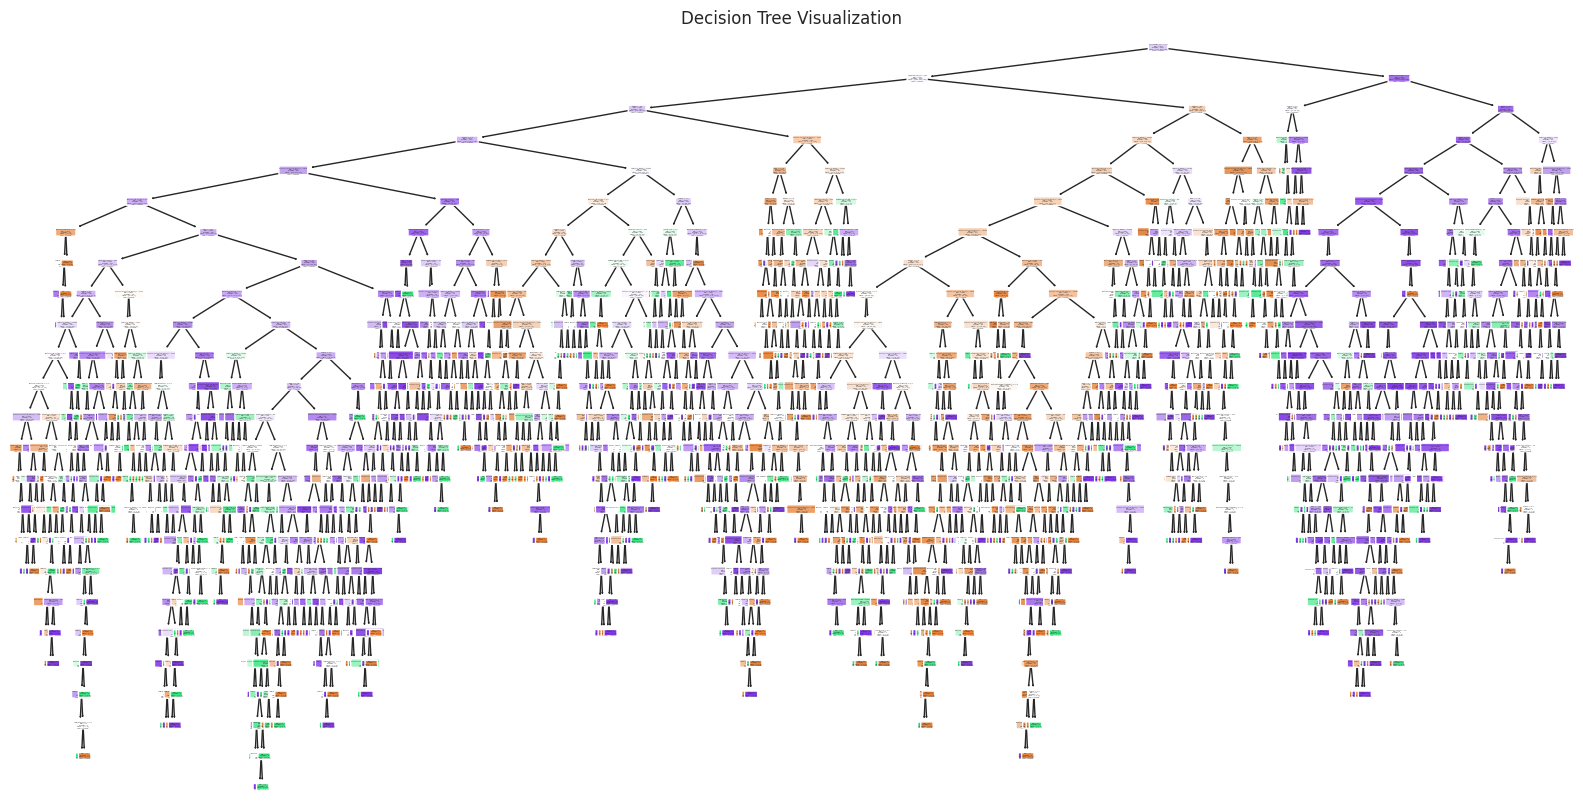

In [53]:
plt.figure(figsize=(20, 10))  # Adjust figure size for better readability
plot_tree(
    clf, 
    feature_names=X.columns.tolist(),  # Feature names for nodes
    class_names=['Dropout', 'Enrolled', 'Graduate'],  # Target class names
    filled=True,  # Color nodes based on class or feature importance
    rounded=True  # Round node boxes for aesthetics
)
plt.title("Decision Tree Visualization")
plt.show()

The rules that we have generated from the class can be stored in a dataframe for better readability.


In [54]:
# Extract all paths from the TreeSplanerClassifier
all_paths = tree_explainer.find_paths_from_root()

# Prepare data for tabular visualization
rules_data = []
for path in all_paths:
    conditions = []
    for node in path[:-1]:  # Exclude the leaf node
        if node in tree_explainer.children_right:
            eq = ">"
        else:
            eq = "<="
        condition = f"{tree_explainer.feature_names[tree_explainer.feature[node]]} {eq} {round(tree_explainer.threshold[node], 2)}"
        conditions.append(condition)
    
    # Extract class and probability at the leaf node
    leaf_node = path[-1]
    predicted_class = tree_explainer.target_names[np.argmax(tree_explainer.value[leaf_node][0])]
    probability = round(np.max(tree_explainer.value[leaf_node][0]) / np.sum(tree_explainer.value[leaf_node][0]), 3)
    
    # Append to rules_data
    rules_data.append({
        "Rule": " AND ".join(conditions),
        "Predicted Class": predicted_class,
        "Probability": probability
    })

# Convert to DataFrame
rules_df = pd.DataFrame(rules_data)
rules_df.head(10) 

,Rule,Predicted Class,Probability
0,Scholarship holder <= 0.5 AND Age at enrollmen...,Graduate,1.0
1,Scholarship holder <= 0.5 AND Age at enrollmen...,Dropout,1.0
2,Scholarship holder <= 0.5 AND Age at enrollmen...,Dropout,1.0
3,Scholarship holder <= 0.5 AND Age at enrollmen...,Dropout,1.0
4,Scholarship holder <= 0.5 AND Age at enrollmen...,Dropout,1.0
5,Scholarship holder <= 0.5 AND Age at enrollmen...,Enrolled,1.0
6,Scholarship holder <= 0.5 AND Age at enrollmen...,Dropout,1.0
7,Scholarship holder <= 0.5 AND Age at enrollmen...,Graduate,1.0
8,Scholarship holder <= 0.5 AND Age at enrollmen...,Graduate,1.0
9,Scholarship holder <= 0.5 AND Age at enrollmen...,Enrolled,1.0


In [55]:
rules_df['Rule'].iloc[0]

"Scholarship holder <= 0.5 AND Age at enrollment <= 22.5 AND Debtor <= 0.5 AND Gender <= 0.5 AND Previous qualification (grade) <= 140.5 AND Mother's qualification <= 0.0 AND Mother's occupation <= 1.5 AND Application order <= 2.5 AND Father's occupation <= 6.0"

The output generated from the decision tree can be overwhelming and impractical to use in its raw form. The utility of this textual representation lies in specific use cases where interpretability and rule extraction are essential. Let's explain how this can be made useful:

#### Potential use cases

- **Interpretability for stakeholders:**
    * In domains like education, healthcare, or finance, stakeholders may require insights into how predictions are made (e.g., why a student is classified as "Dropout"). By summarizing key rules instead of providing all paths, decision-makers can understand critical factors influencing the predictions.

- **Feature importance analysis:**
    * The extracted rules highlight which features and thresholds significantly impact decisions, helping identify the most important predictors.

- **Rule-based system integration:**
    * Rules can be directly integrated into systems where explicit decision-making criteria are required, such as automated workflows or audits.

- **Debugging models:**
    * Understanding decision paths can help debug issues with the model, such as overfitting or unexpected behavior.


#### How to simplify this output

- **Summarize key rules:**
    * Extract only the most important paths (e.g., those contributing to a high proportion of predictions or those with a high probability).

- **Visualize rules as a decision tree:**
    * Use tools such as Graphviz to generate visual decision trees that are easier to interpret than raw text.

- **Cluster and aggregate rules:**
    * Group similar rules together to avoid redundancy and make the output concise.


In [56]:
# Summarize key rules
def summarize_rules(clf, feature_names):
    rules = export_text(clf, feature_names=feature_names)
    print("Decision Tree Rules Summary:")
    print(rules[:2000])  # Print the first 2000 characters for brevity
    return rules

# Example usage
rules_summary = summarize_rules(clf, X.columns.tolist())

Decision Tree Rules Summary:
|--- Scholarship holder <= 0.50
|   |--- Age at enrollment <= 22.50
|   |   |--- Debtor <= 0.50
|   |   |   |--- Gender <= 0.50
|   |   |   |   |--- Previous qualification (grade) <= 140.50
|   |   |   |   |   |--- Mother's qualification <= 0.00
|   |   |   |   |   |   |--- Mother's occupation <= 1.50
|   |   |   |   |   |   |   |--- Application order <= 2.50
|   |   |   |   |   |   |   |   |--- Father's occupation <= 6.00
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- Father's occupation >  6.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Application order >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Mother's occupation >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Mother's qualification >  0.00
|   |   |   |   |   |   |--- GDP <= -1.31
|   |   |   |   |   |   |   |--- Age at enrollment <= 20.50
|   |   |   |   |

## <a id='exercises'></a>[Exercises](#toc)


### <a id='Exercise-1'></a>[Exercise 1: Introduce data leakage in a decision tree classifier](#toc)
**Task:** Add a "leakage feature" to the iris dataset (from sklearn.datasets import load_iris) that directly correlates with the target variable i.e. deliberately introduce a leakage feature to the Iris dataset to observe its impact on model training and performance. A leakage feature is a variable that is directly or indirectly correlated with the target variable, providing the model with information that would not be available at prediction time. Train a DecisionTreeClassifier, visualize the tree, and the feature importance plot. Identify the leakage feature.


#### Question to yourself: Which feature shows unusually high importance? Why is this problematic?


In [ ]:
# TODO Add your code here - first try yourself, then check the solution below

<details>
    <summary>Click here for Solution</summary>

```python
# Step 1: Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 2: Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Step 3: Introduce a leakage feature
# Add a column that directly correlates with the target (e.g., y + random noise)
X['leakage_feature'] = y + np.random.normal(0, 0.1, size=len(y))

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Leakage: {accuracy:.2f}")

# Step 7: Plot feature importance
feature_importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.title("Feature Importance with Leakage")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

```

</details>


### <a id='Exercise-2'></a>[Exercise 2: Compare models with and without data leakage](#toc)
**Task:** Train two RandomForestClassifier models on the previously imported iris dataset, one with and one without the leakage feature. By comparing their performances and feature importances, you will observe how data leakage artificially inflates model accuracy and skews feature importance.

#### Question to yourself: Why is the model with leakage misleading?


In [ ]:
# TODO Add your code here - first try yourself, then check the solution below

<details>
    <summary>Click here for Solution</summary>

```python
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Step 2: Train a Random Forest WITH leakage
rf_with_leakage = RandomForestClassifier(n_estimators=100, random_state=42)
rf_with_leakage.fit(X_train, y_train)

# Step 3: Train a Random Forest WITHOUT leakage
X_train_no_leakage = X_train.drop(columns=['leakage_feature'])
X_test_no_leakage = X_test.drop(columns=['leakage_feature'])
rf_no_leakage = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_leakage.fit(X_train_no_leakage, y_train)

# Step 4: Evaluate both models
y_pred_with_leakage = rf_with_leakage.predict(X_test)
y_pred_no_leakage = rf_no_leakage.predict(X_test_no_leakage)

accuracy_with_leakage = accuracy_score(y_test, y_pred_with_leakage)
accuracy_no_leakage = accuracy_score(y_test, y_pred_no_leakage)

print(f"Accuracy with Leakage: {accuracy_with_leakage:.2f}")
print(f"Accuracy without Leakage: {accuracy_no_leakage:.2f}")

# Step 5: Plot feature importance for both models
plt.figure(figsize=(12, 6))

# With leakage
plt.subplot(1, 2, 1)
plt.barh(X.columns, rf_with_leakage.feature_importances_, color='salmon')
plt.title("Feature Importance WITH Leakage")
plt.xlabel("Importance")
plt.ylabel("Features")

# Without leakage
plt.subplot(1, 2, 2)
plt.barh(X_train_no_leakage.columns, rf_no_leakage.feature_importances_, color='lightgreen')
plt.title("Feature Importance WITHOUT Leakage")
plt.xlabel("Importance")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

```

</details>


## <a id='authors'></a>[Authors](#toc)


[Joseph Santarcangelo](https://author.skills.network/instructors/joseph_santarcangelo)  
[Faranak Heidari](https://author.skills.network/instructors/faranak_heidari)  
[Karan Goswami](https://author.skills.network/instructors/karan_goswami)   

All authors are datascientists at IBM. 




## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-12-15|1.1|Karan & Faranak|Review and Edit|
|2024-11-25|1.0|Joseph|Create Project|



Copyright © 2024 IBM Corporation. All rights reserved.
